# Import Libraries 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno


# Data

## Load Data

In [3]:
bank = pd.read_csv('data\\bank_marketing\\bank\\bank.csv', delimiter=';')
bank_full = pd.read_csv('data\\bank_marketing\\bank\\bank-full.csv', delimiter=';')
bank_add=pd.read_csv('data\\bank_marketing\\bank-additional\\bank-additional\\bank-additional.csv', delimiter=';')
bank_add_full = pd.read_csv('data\\bank_marketing\\bank-additional\\bank-additional\\bank-additional-full.csv', delimiter=';')

In [4]:
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [5]:
bank_full.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [6]:
bank_add.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

In [7]:
bank_add_full.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [8]:
bank.shape

(4521, 17)

In [9]:
bank_full.shape

(45211, 17)

In [10]:
bank_add.shape

(4119, 21)

In [11]:
bank_add_full.shape

(41188, 21)

## Concatenating Data

In [12]:
Bank = pd.concat([bank, bank_full], ignore_index=True)
Bank_Add = pd.concat([bank_add, bank_add_full], ignore_index=True)
Bank.to_csv('Bank.csv', index=False)
Bank_Add.to_csv('Bank_Add.csv', index=False)

In [13]:
Bank.shape

(49732, 17)

In [14]:
Bank_Add.shape

(45307, 21)

## EDA 

### Insightful Attribute Details

In [15]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [16]:
Bank_Add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45307 non-null  int64  
 1   job             45307 non-null  object 
 2   marital         45307 non-null  object 
 3   education       45307 non-null  object 
 4   default         45307 non-null  object 
 5   housing         45307 non-null  object 
 6   loan            45307 non-null  object 
 7   contact         45307 non-null  object 
 8   month           45307 non-null  object 
 9   day_of_week     45307 non-null  object 
 10  duration        45307 non-null  int64  
 11  campaign        45307 non-null  int64  
 12  pdays           45307 non-null  int64  
 13  previous        45307 non-null  int64  
 14  poutcome        45307 non-null  object 
 15  emp.var.rate    45307 non-null  float64
 16  cons.price.idx  45307 non-null  float64
 17  cons.conf.idx   45307 non-null 

In [17]:
Bank.describe()

age        balance           day      duration      campaign  \
count  49732.000000   49732.000000  49732.000000  49732.000000  49732.000000   
mean      40.957472    1367.761562     15.816315    258.690179      2.766549   
std       10.615008    3041.608766      8.315680    257.743149      3.099075   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    320.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  49732.000000  49732.000000  
mean      40.158630      0.576892  
std      100.127123      2.254838  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [18]:
Bank_Add.describe()

age      duration      campaign         pdays      previous  \
count  45307.000000  45307.000000  45307.000000  45307.000000  45307.000000   
mean      40.032203    258.148917      2.564835    962.288785      0.174543   
std       10.411407    258.864200      2.752261    187.370863      0.499364   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    319.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  45307.000000    45307.000000   45307.000000  45307.000000  45307.000000  
mean       0.082166       93.576032     -40.502282      3.621297   5166.985525  
std        1.570231        0.578881       4.625101      1.734350     72.380791  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

### Univariate Analysis of Key Variables

#### Age

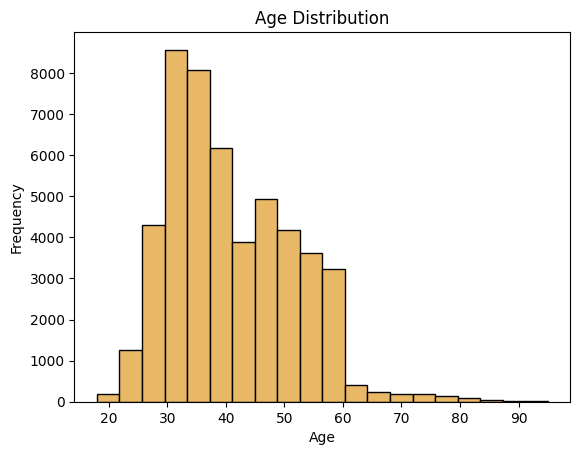

In [19]:
plt.hist(Bank['age'], bins=20, color='#E8B867', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

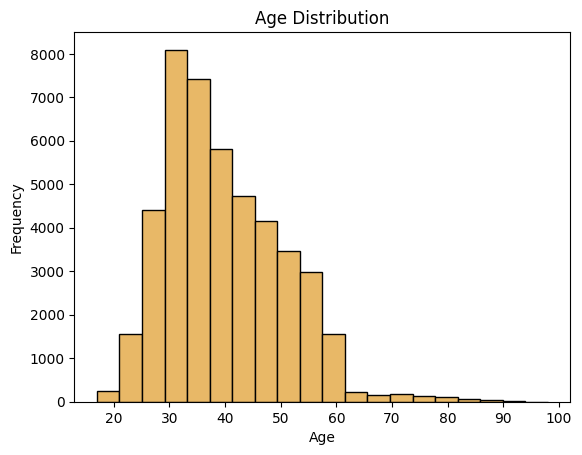

In [20]:
plt.hist(Bank_Add['age'], bins=20, color='#E8B867', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

#### Balance

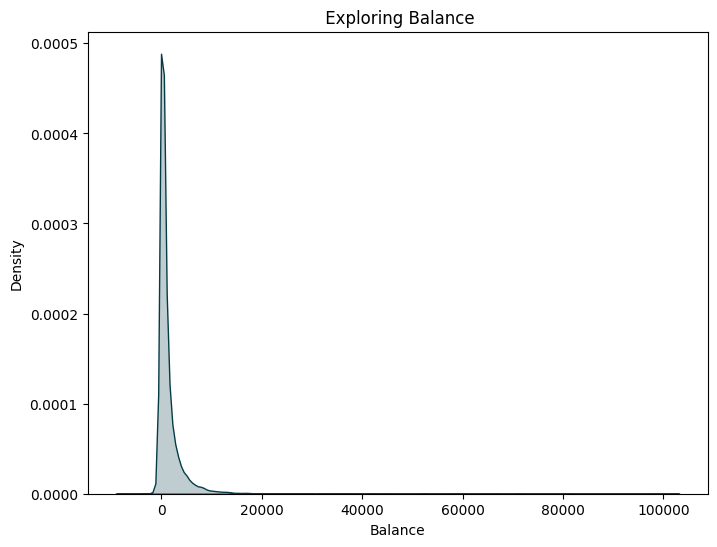

In [21]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Bank['balance'], fill=True, color='#053B47')
plt.xlabel('Balance')
plt.title(' Exploring Balance')
plt.show()

#### Day

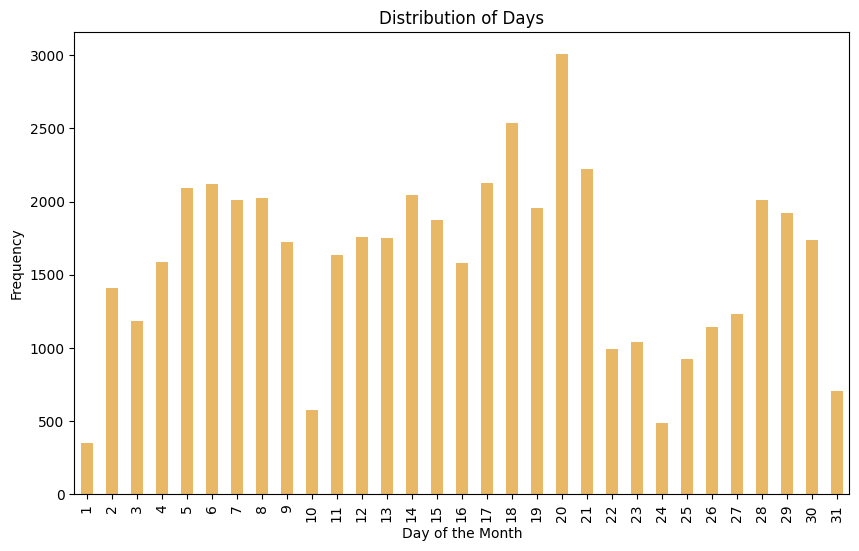

In [22]:
plt.figure(figsize=(10, 6))
Bank['day'].value_counts().sort_index().plot(kind='bar', color='#E8B867')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')
plt.title('Distribution of Days')
plt.show()

#### Duration

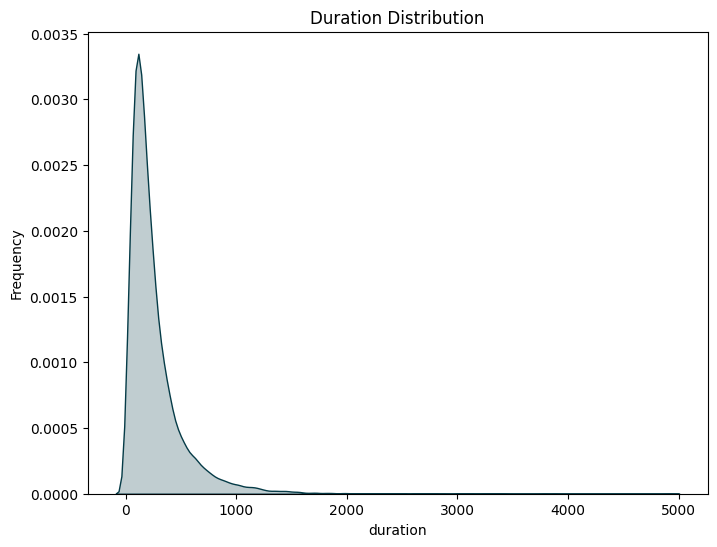

In [23]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Bank['duration'], fill=True, color='#053B47')
plt.ylabel('Frequency')
plt.title('Duration Distribution')
plt.show()

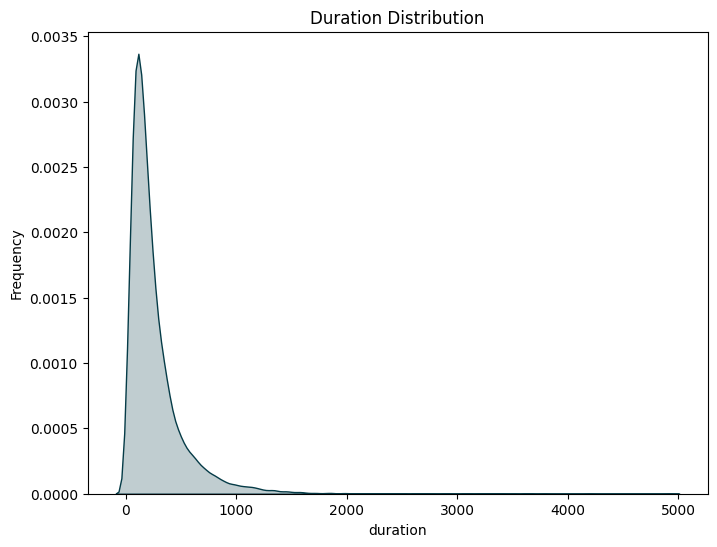

In [24]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Bank_Add['duration'], fill=True, color='#053B47')
plt.ylabel('Frequency')
plt.title('Duration Distribution')
plt.show()

#### Campaign

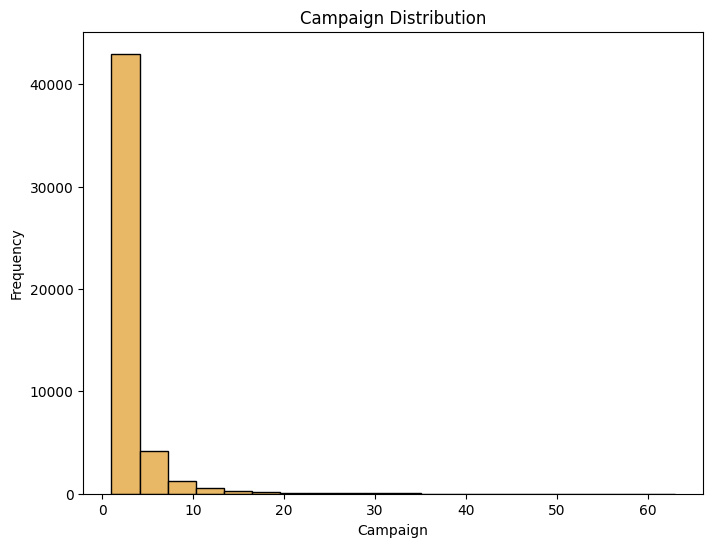

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(Bank['campaign'], bins=20, color='#E8B867', edgecolor='black')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.title('Campaign Distribution')
plt.show()

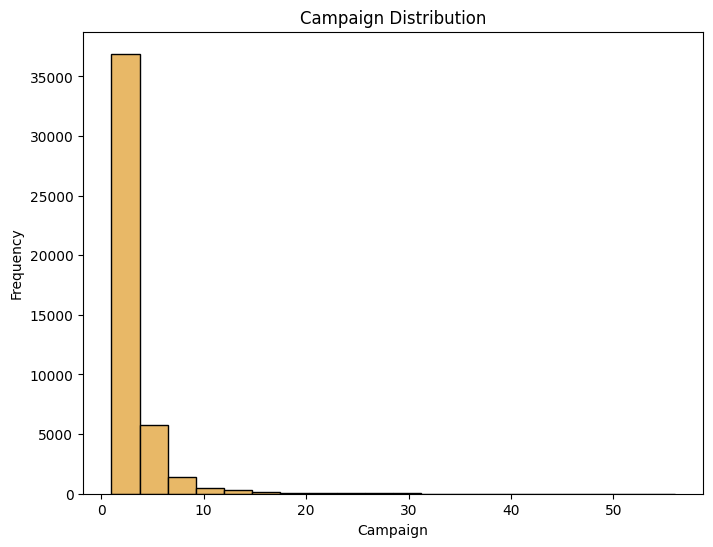

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(Bank_Add['campaign'], bins=20, color='#E8B867', edgecolor='black')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.title('Campaign Distribution')
plt.show()

#### Pdays

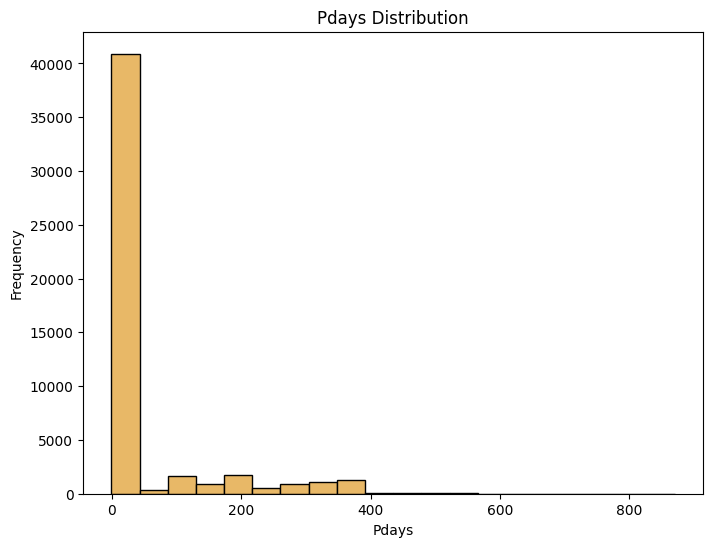

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(Bank['pdays'], bins=20, color='#E8B867', edgecolor='black')
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.title('Pdays Distribution')
plt.show()

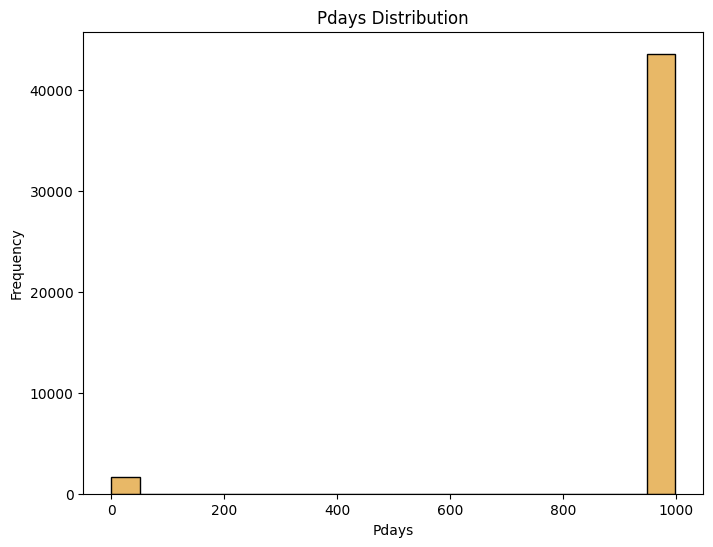

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(Bank_Add['pdays'], bins=20, color='#E8B867', edgecolor='black')
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.title('Pdays Distribution')
plt.show()

#### Previous

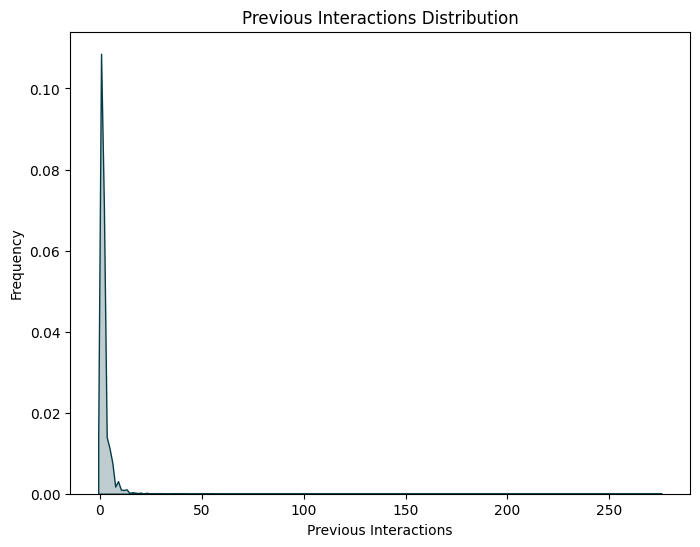

In [29]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Bank['previous'], fill=True, color='#053B47')
plt.xlabel('Previous Interactions')
plt.ylabel('Frequency')
plt.title('Previous Interactions Distribution')
plt.show()

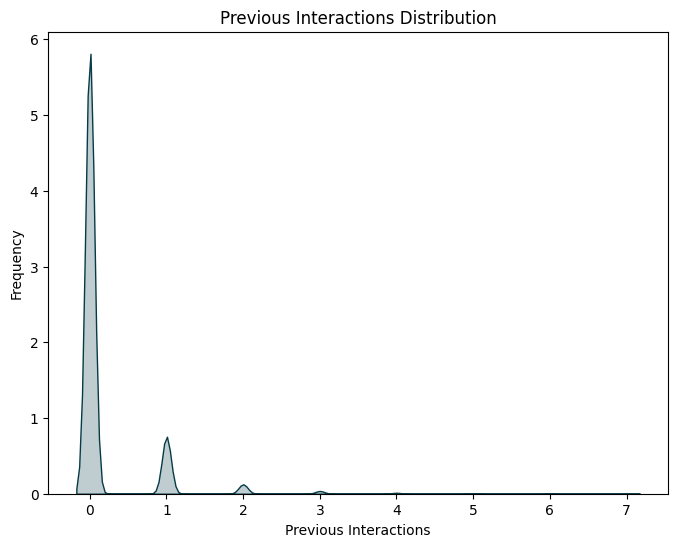

In [30]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Bank_Add['previous'], fill=True, color='#053B47')
plt.xlabel('Previous Interactions')
plt.ylabel('Frequency')
plt.title('Previous Interactions Distribution')
plt.show()

#### Employment Variation Rate

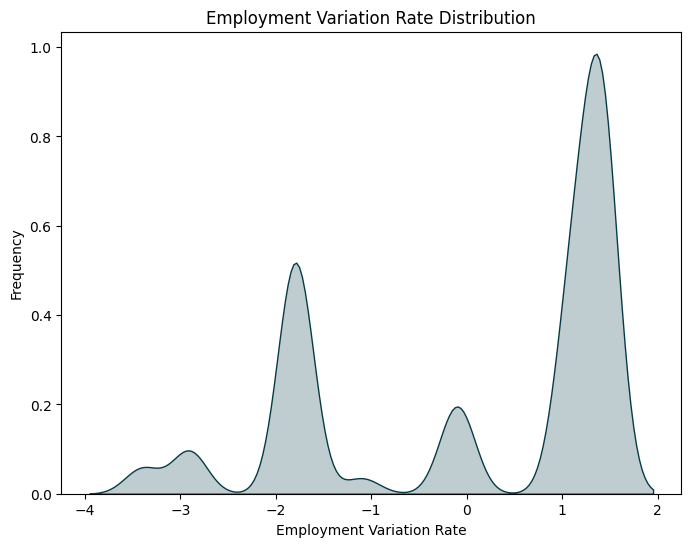

In [31]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Bank_Add['emp.var.rate'], fill=True, color='#053B47')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Frequency')
plt.title('Employment Variation Rate Distribution')
plt.show()

#### Consumer Price Index

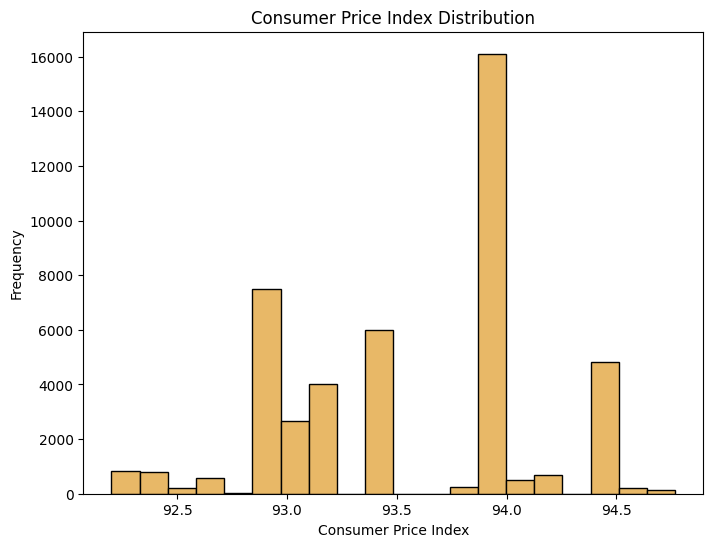

In [32]:
plt.figure(figsize=(8, 6))
plt.hist(Bank_Add['cons.price.idx'], bins=20, color='#E8B867', edgecolor='black')
plt.xlabel('Consumer Price Index')
plt.ylabel('Frequency')
plt.title('Consumer Price Index Distribution')
plt.show()

#### Consumer Confidence Index

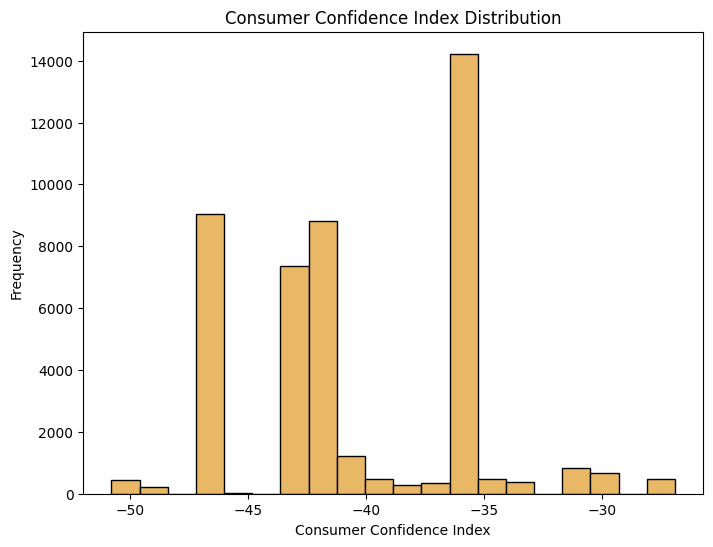

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(Bank_Add['cons.conf.idx'], bins=20, color='#E8B867', edgecolor='black')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Frequency')
plt.title('Consumer Confidence Index Distribution')
plt.show()

#### EURIBOR 3-Month Rate

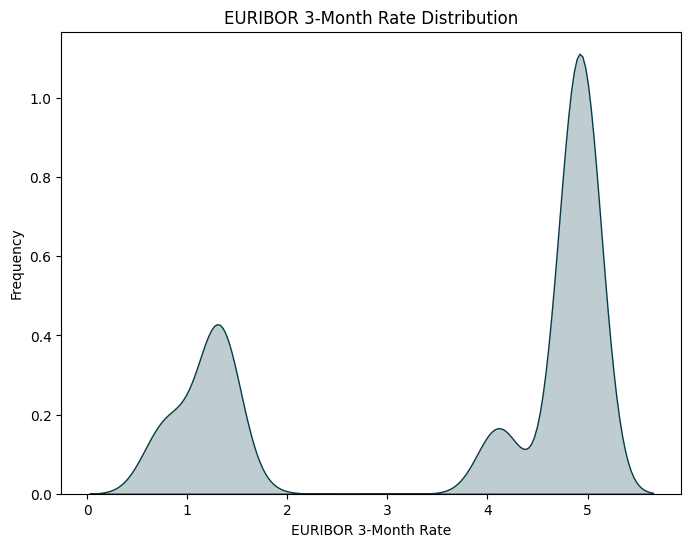

In [34]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Bank_Add['euribor3m'], fill=True, color='#053B47')
plt.xlabel('EURIBOR 3-Month Rate')
plt.ylabel('Frequency')
plt.title('EURIBOR 3-Month Rate Distribution')
plt.show()

#### Number of Employees

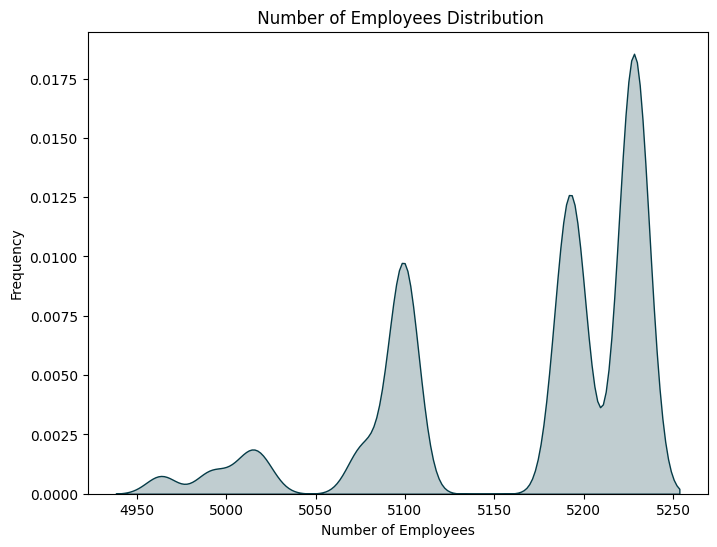

In [35]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Bank_Add['nr.employed'], fill=True, color='#053B47')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.title(' Number of Employees Distribution')
plt.show()

### Correlation Analysis

#### Heatmap

<Axes: >

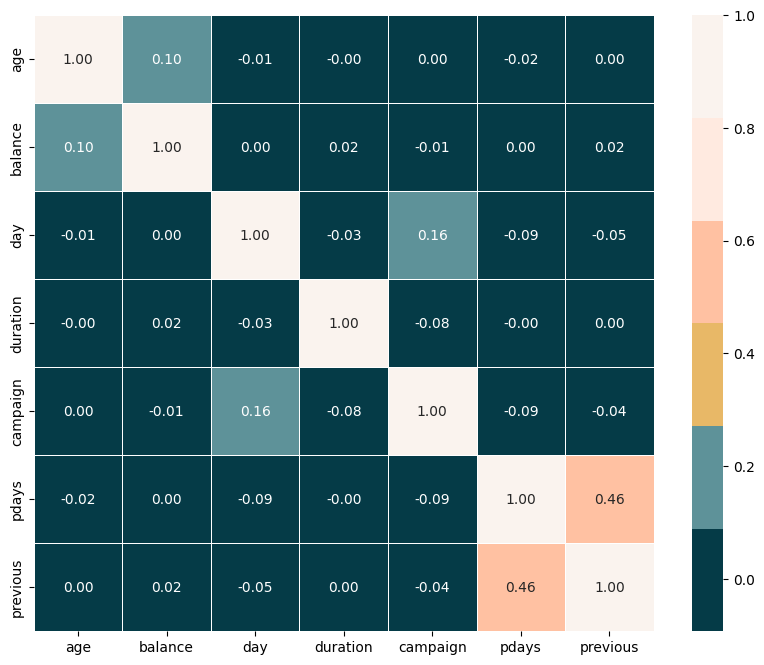

In [36]:
custom_colors = ['#053B47', '#5E9299', '#E8B867', '#FFC1A2', '#FFEAE0', '#FAF3EE']
numeric_Bank = Bank.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_Bank.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(custom_colors), fmt=".2f", linewidths=.5)


<Axes: >

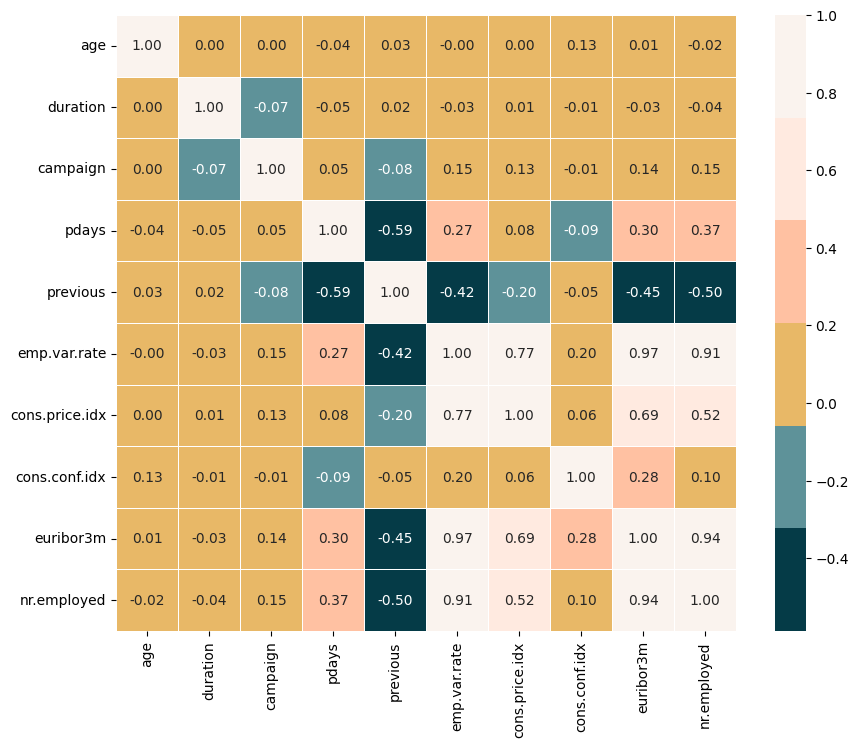

In [37]:
numeric_Bank_Add = Bank_Add.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_Bank_Add.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(custom_colors), fmt=".2f", linewidths=.5)

#### Pairplot

c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: U

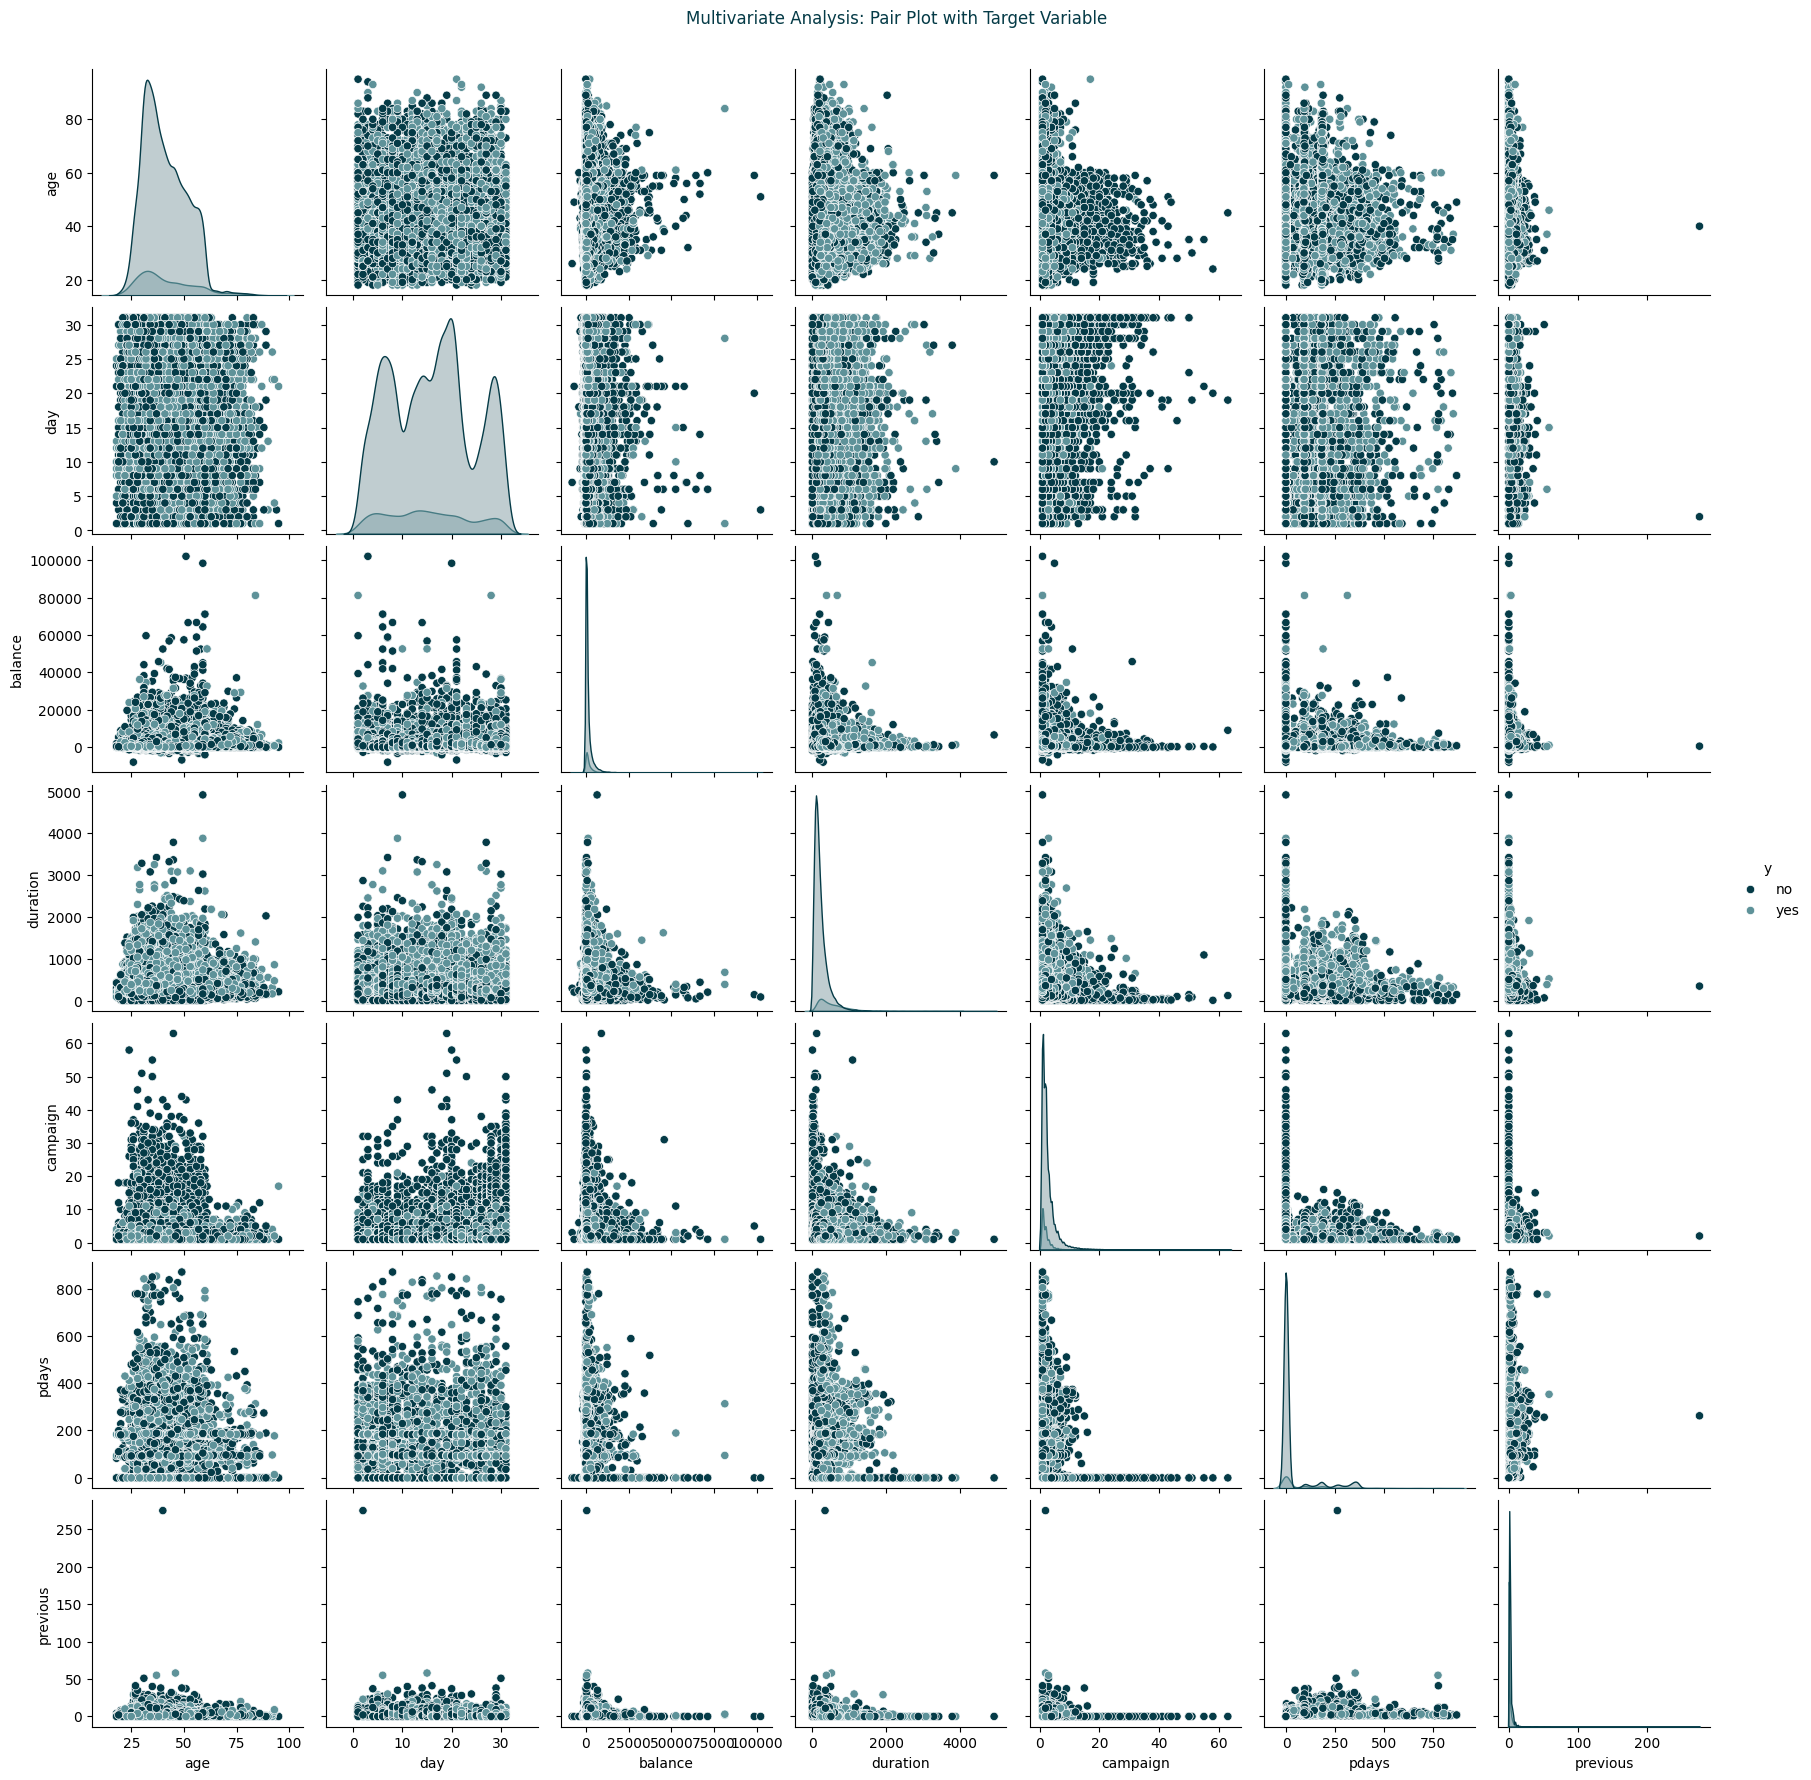

In [38]:
custom_palette = ['#053B47', '#5E9299', '#E8B867', '#FFC1A2', '#FFEAE0', '#FAF3EE']
sns.pairplot(Bank[['age', 'day', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y']], hue='y', palette=custom_palette)
plt.suptitle('Multivariate Analysis: Pair Plot with Target Variable', y=1.02, color='#053B47')  # You can adjust the title color
plt.show()

c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: U

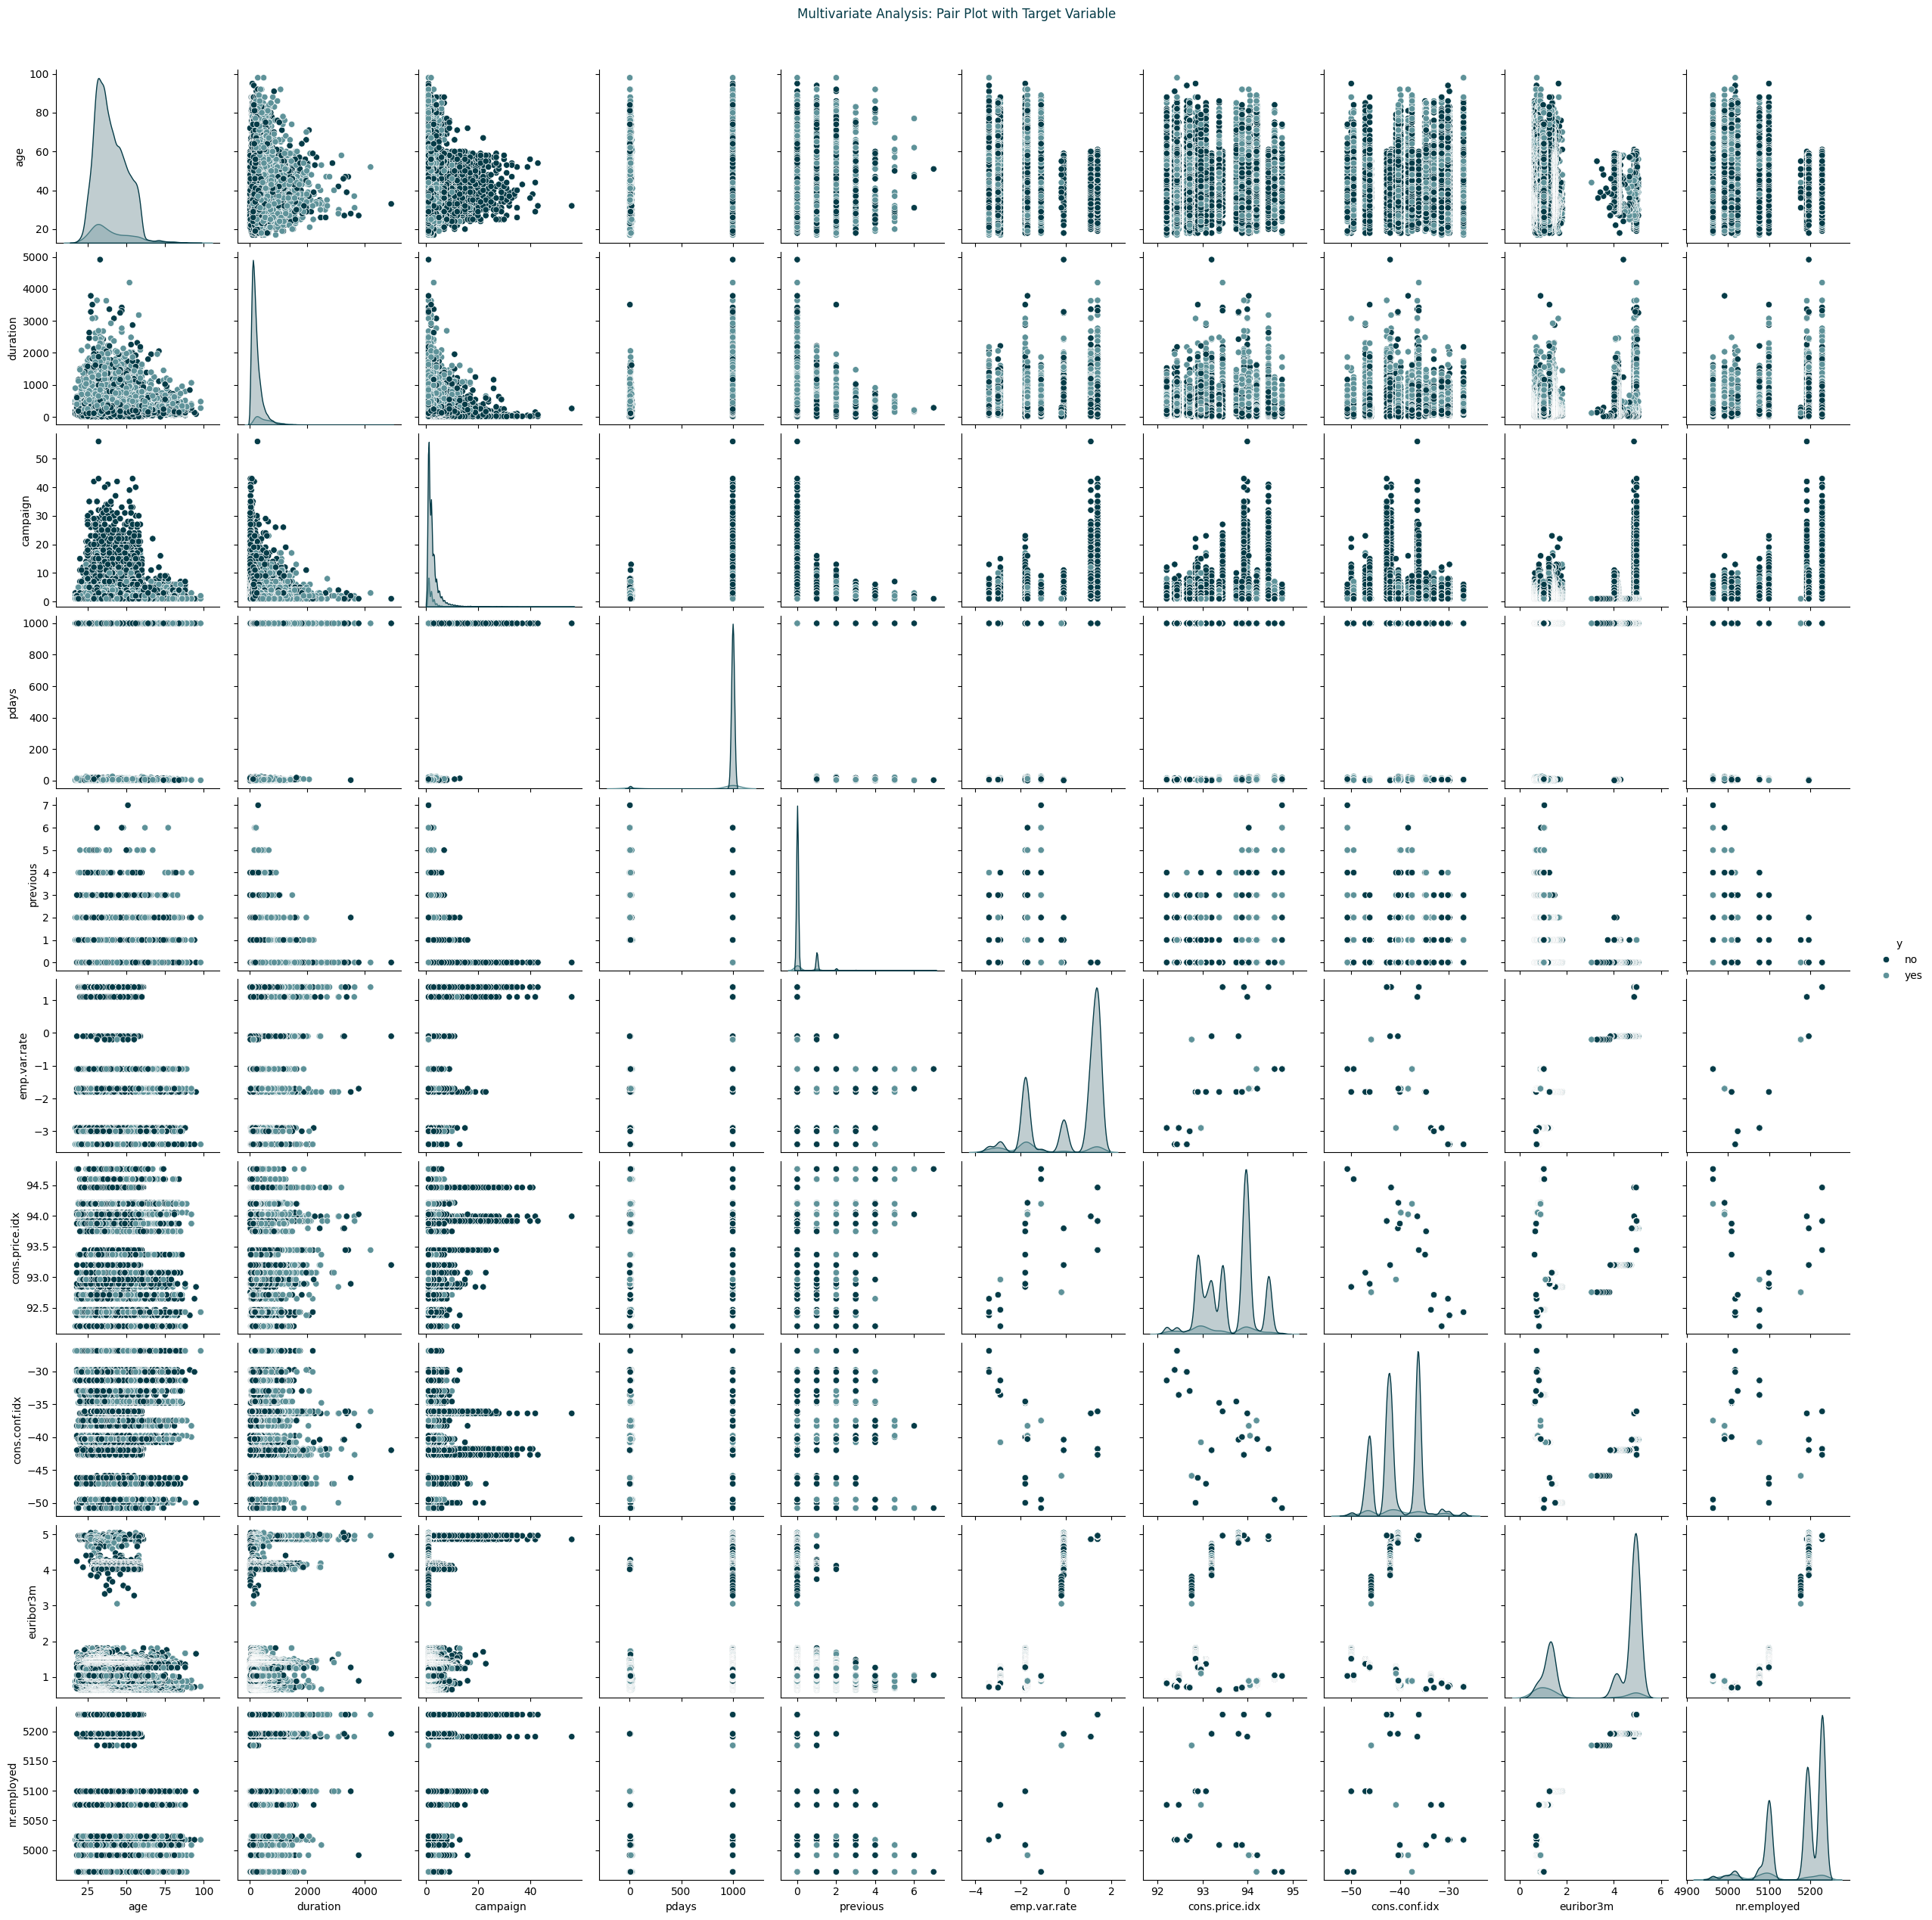

In [39]:
custom_palette = ['#053B47', '#5E9299', '#E8B867', '#FFC1A2', '#FFEAE0', '#FAF3EE']
sns.pairplot(Bank_Add[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']], hue='y', palette=custom_palette)
plt.suptitle('Multivariate Analysis: Pair Plot with Target Variable', y=1.02, color='#053B47')  # You can adjust the title color
plt.show()

### Categorical Data Exploration

In [40]:
Bank.describe(include='O')

job  marital  education default housing   loan   contact  \
count         49732    49732      49732   49732   49732  49732     49732   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq          10678    30011      25508   48841   27689  41797     32181   

        month poutcome      y  
count   49732    49732  49732  
unique     12        4      2  
top       may  unknown     no  
freq    15164    40664  43922

In [41]:
Bank_Add.describe(include='O')

job  marital          education default housing   loan   contact  \
count    45307    45307              45307   45307   45307  45307     45307   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     11434    27437              13432   35903   23751  37299     28796   

        month day_of_week     poutcome      y  
count   45307       45307        45307  45307  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    15147        9483        39086  40216

#### Job

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\1219349125.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='job', hue='y', data=Bank, palette=custom_colors)


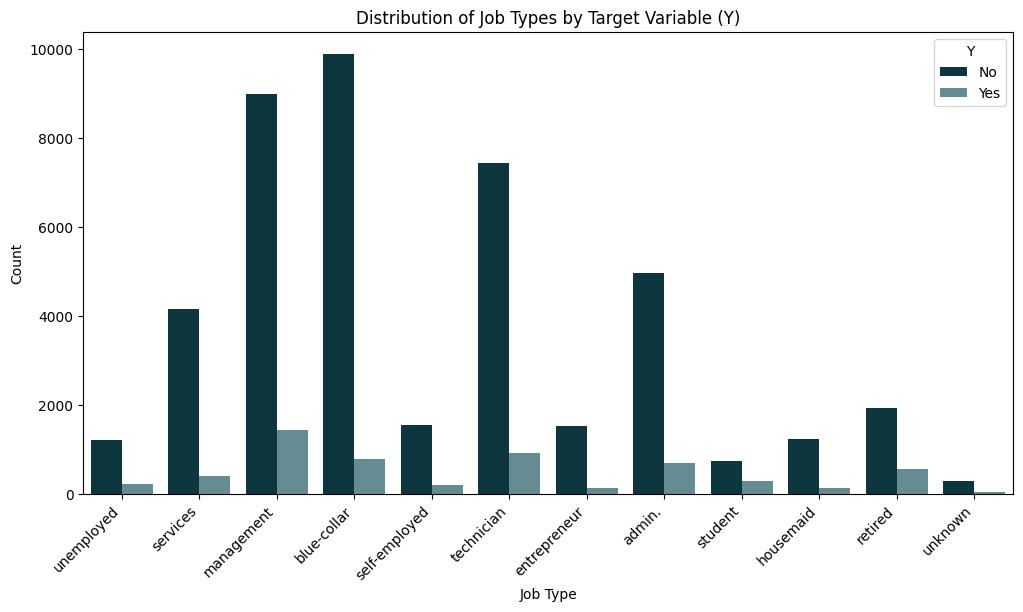

In [42]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]

plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=Bank, palette=custom_colors)
plt.title('Distribution of Job Types by Target Variable (Y)')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\1630032976.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='job', hue='y', data=Bank_Add, palette=custom_colors)


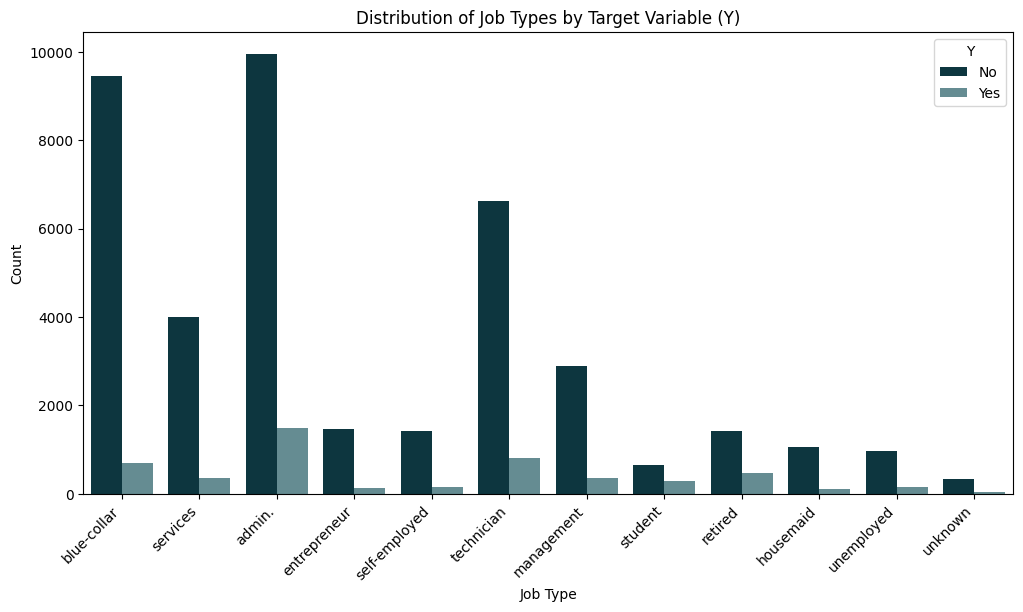

In [43]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]

plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=Bank_Add, palette=custom_colors)
plt.title('Distribution of Job Types by Target Variable (Y)')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

#### Marital

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\1935409344.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='marital', hue='y', data=Bank, palette=custom_colors)


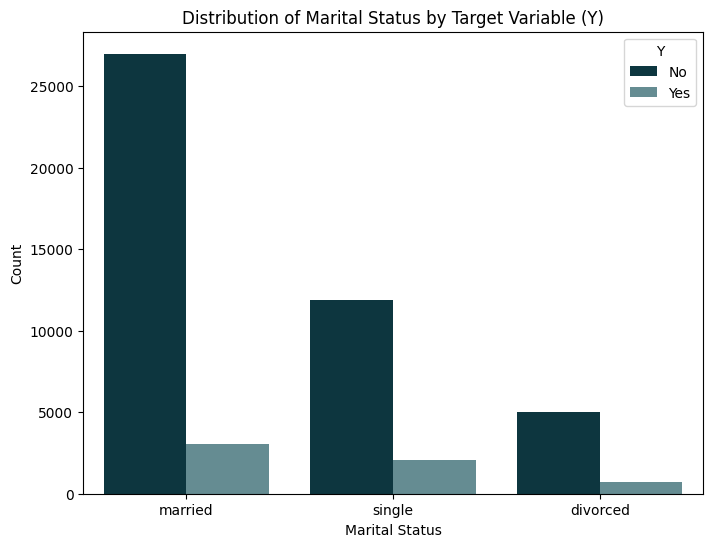

In [44]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]

plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='y', data=Bank, palette=custom_colors)
plt.title('Distribution of Marital Status by Target Variable (Y)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\3405776406.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='marital', hue='y', data=Bank_Add, palette=custom_colors)


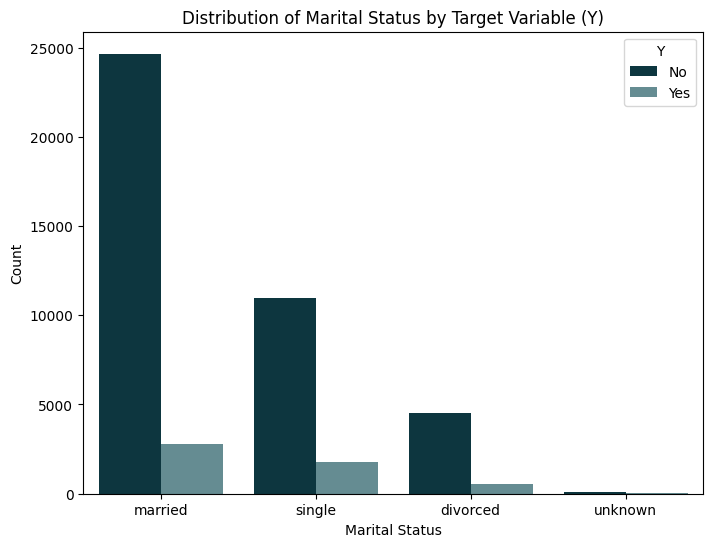

In [45]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]

plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='y', data=Bank_Add, palette=custom_colors)
plt.title('Distribution of Marital Status by Target Variable (Y)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

#### Education

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\1048753823.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='education', hue='y', data=Bank, palette=custom_colors)


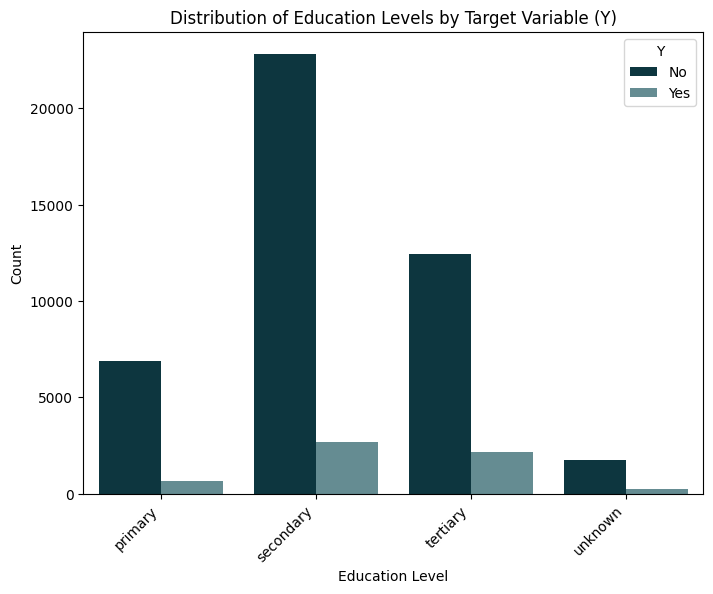

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='y', data=Bank, palette=custom_colors)
plt.title('Distribution of Education Levels by Target Variable (Y)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\3043485000.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='education', hue='y', data=Bank_Add, palette=custom_colors)


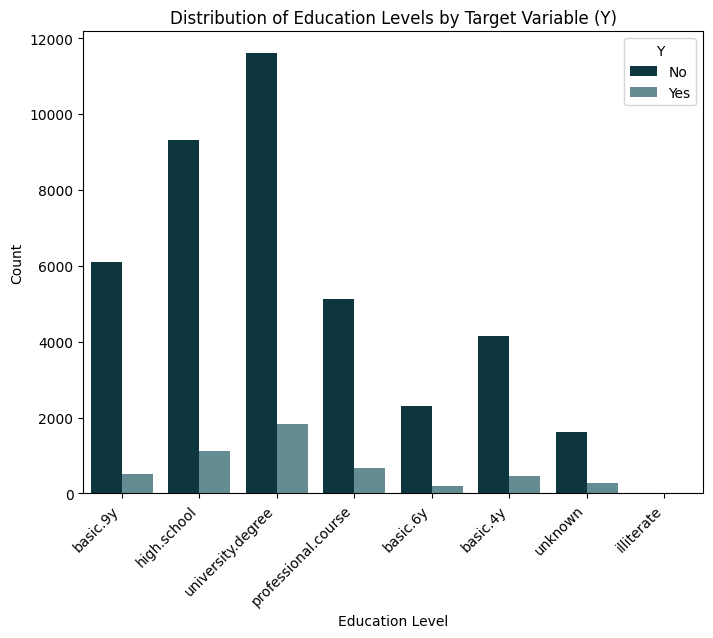

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='y', data=Bank_Add, palette=custom_colors)
plt.title('Distribution of Education Levels by Target Variable (Y)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

#### Default

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\2412057464.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='default', hue='y', data=Bank, palette=custom_colors)


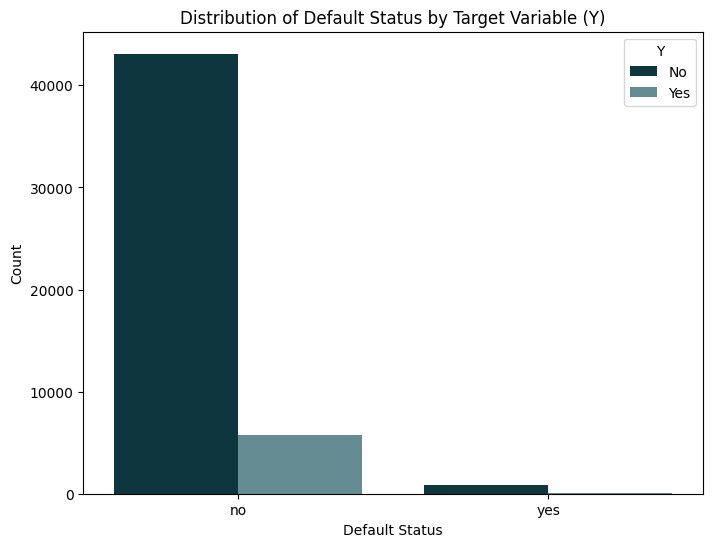

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='default', hue='y', data=Bank, palette=custom_colors)
plt.title('Distribution of Default Status by Target Variable (Y)')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\1501816800.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='default', hue='y', data=Bank_Add, palette=custom_colors)


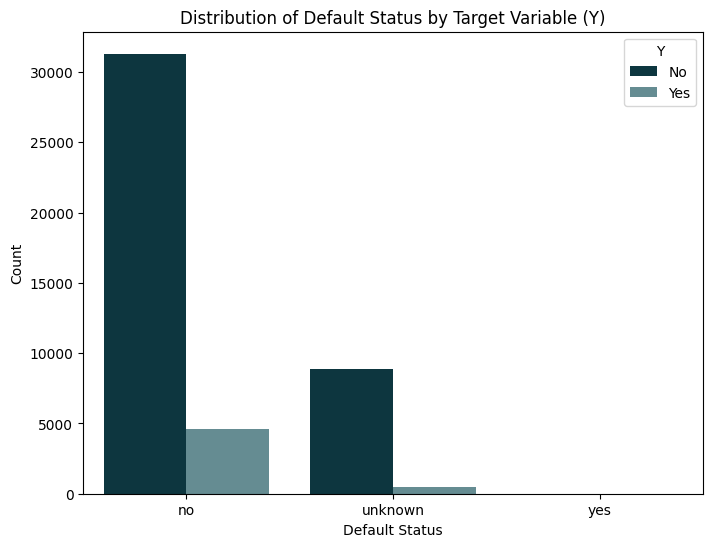

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='default', hue='y', data=Bank_Add, palette=custom_colors)
plt.title('Distribution of Default Status by Target Variable (Y)')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()


#### Housing

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\3967458227.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='housing', hue='y', data=Bank , palette=custom_colors)


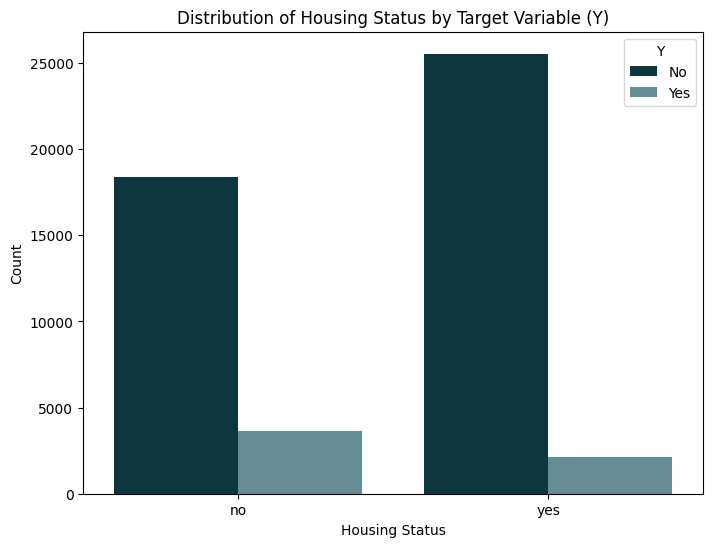

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='housing', hue='y', data=Bank , palette=custom_colors)
plt.title('Distribution of Housing Status by Target Variable (Y)')
plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\2958035143.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='housing', hue='y', data=Bank_Add , palette=custom_colors)


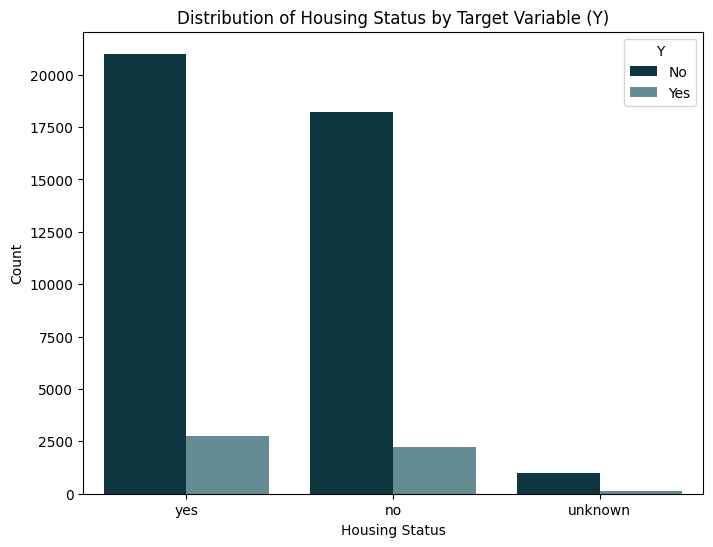

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(x='housing', hue='y', data=Bank_Add , palette=custom_colors)
plt.title('Distribution of Housing Status by Target Variable (Y)')
plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

#### Loan

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\1925720246.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='loan', hue='y', data=Bank, palette=custom_colors)


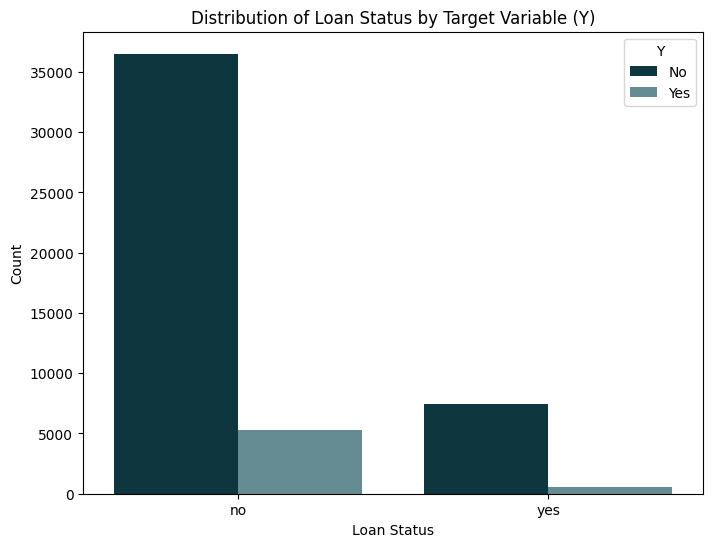

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan', hue='y', data=Bank, palette=custom_colors)
plt.title('Distribution of Loan Status by Target Variable (Y)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\4018080094.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='loan', hue='y', data=Bank_Add, palette=custom_colors)


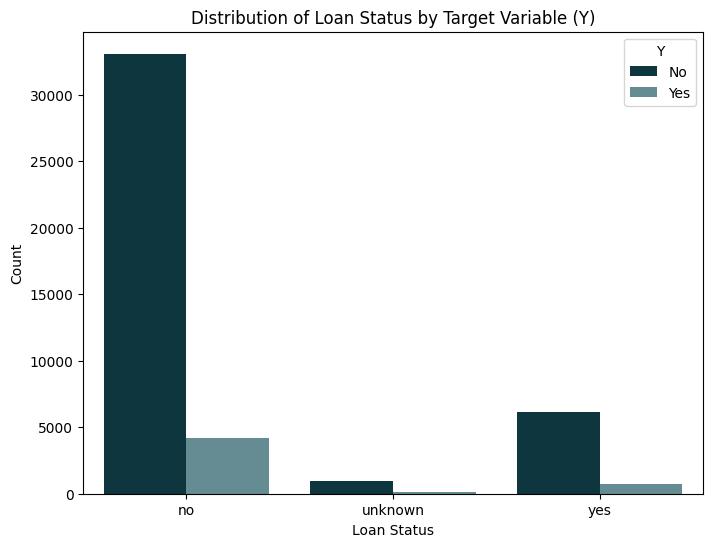

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan', hue='y', data=Bank_Add, palette=custom_colors)
plt.title('Distribution of Loan Status by Target Variable (Y)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

#### Contact

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\3234905465.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='contact', hue='y', data=Bank, palette=custom_colors)


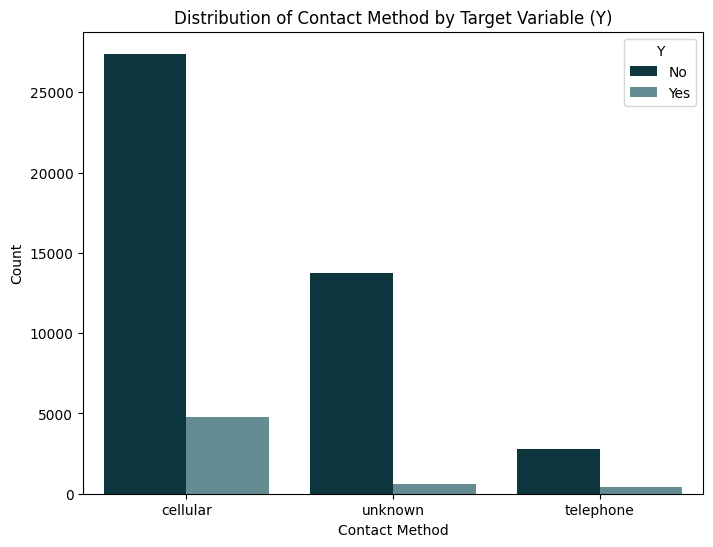

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x='contact', hue='y', data=Bank, palette=custom_colors)
plt.title('Distribution of Contact Method by Target Variable (Y)')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\1146732933.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='contact', hue='y', data=Bank_Add, palette=custom_colors)


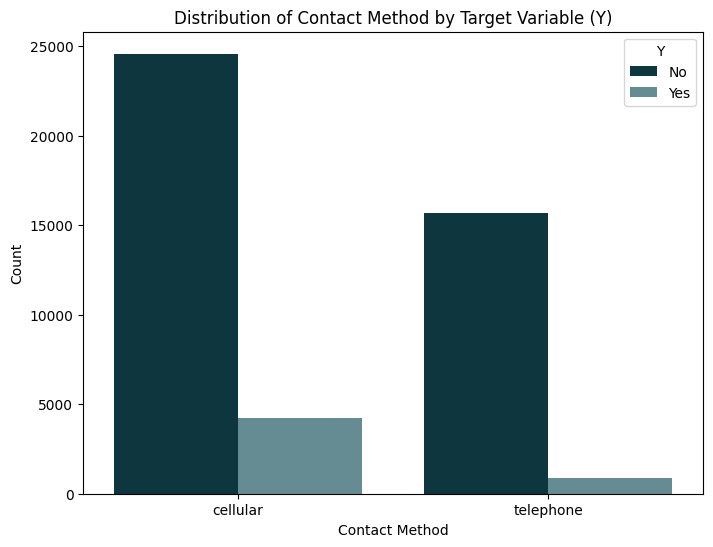

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(x='contact', hue='y', data=Bank_Add, palette=custom_colors)
plt.title('Distribution of Contact Method by Target Variable (Y)')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

#### Month

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\3585606730.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='month', hue='y', data=Bank, palette=custom_colors)


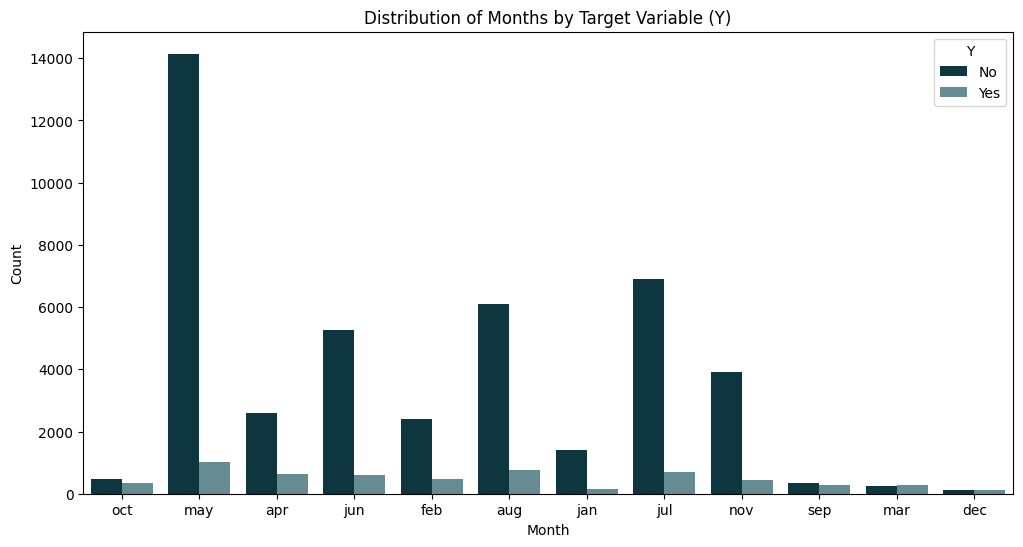

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='y', data=Bank, palette=custom_colors)
plt.title('Distribution of Months by Target Variable (Y)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\3585606730.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='month', hue='y', data=Bank, palette=custom_colors)


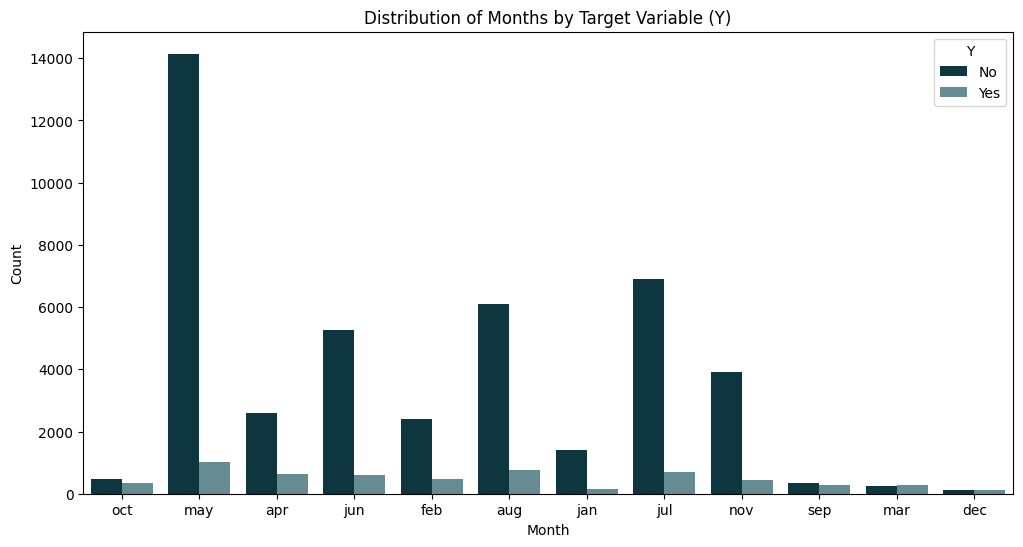

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='y', data=Bank, palette=custom_colors)
plt.title('Distribution of Months by Target Variable (Y)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

#### Poutcome

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\948650108.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='poutcome', hue='y', data=Bank, palette=custom_colors)


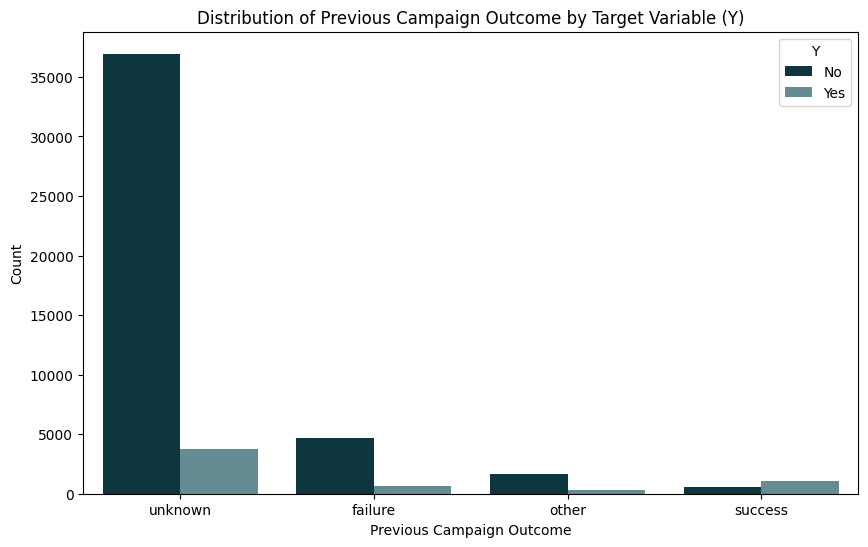

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='y', data=Bank, palette=custom_colors)
plt.title('Distribution of Previous Campaign Outcome by Target Variable (Y)')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\376275296.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='poutcome', hue='y', data=Bank_Add, palette=custom_colors)


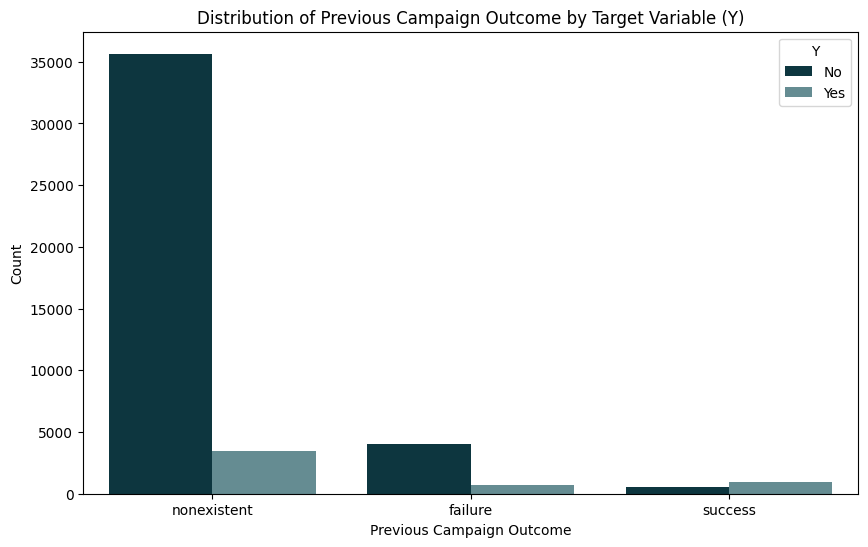

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='y', data=Bank_Add, palette=custom_colors)
plt.title('Distribution of Previous Campaign Outcome by Target Variable (Y)')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

#### Day_Of_Week

C:\Users\maram\AppData\Local\Temp\ipykernel_18612\1523953713.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='day_of_week', hue='y', data=Bank_Add, palette=custom_colors)


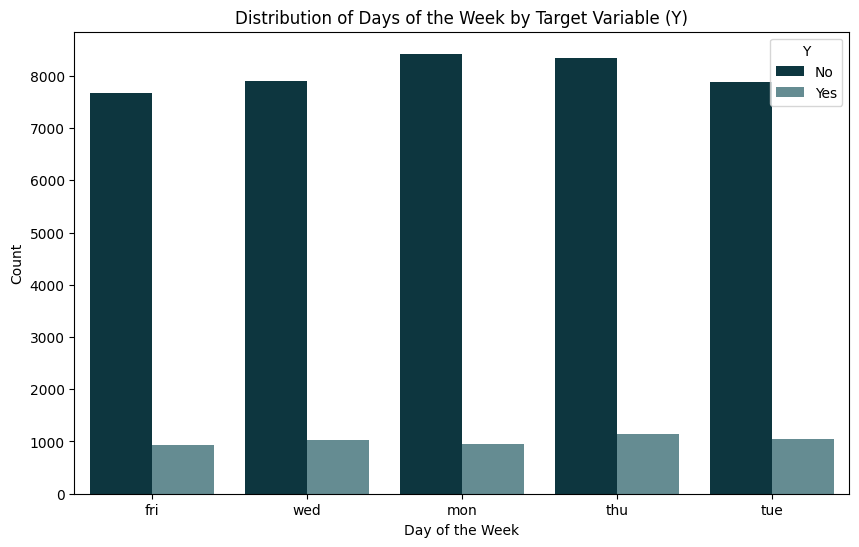

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='y', data=Bank_Add, palette=custom_colors)
plt.title('Distribution of Days of the Week by Target Variable (Y)')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Y', loc='upper right', labels=['No', 'Yes'])
plt.show()

### Outliers Unmasked: Navigating the Landscape of Anomaly Detection

In [61]:
numeric_Bank_1 = ['age', 'balance', 'duration', 'day', 'campaign', 'pdays', 'previous']
# IQR (Interquartile Range)
Q1_Bank = Bank[numeric_Bank_1].quantile(0.25)
Q3_Bank = Bank[numeric_Bank_1].quantile(0.75)
IQR_Bank = Q3_Bank - Q1_Bank
lower_bound_Bank = Q1_Bank - 1.5 * IQR_Bank
upper_bound_Bank = Q3_Bank + 1.5 * IQR_Bank
outliers_iqr_Bank = Bank[(Bank[numeric_Bank_1] < lower_bound_Bank) | (Bank[numeric_Bank_1] > upper_bound_Bank)]

In [62]:
numeric_Bank_Add_1 = ['age', 'duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
# IQR (Interquartile Range)
Q1_Bank_Add = Bank_Add[numeric_Bank_Add_1].quantile(0.25)
Q3_Bank_Add = Bank_Add[numeric_Bank_Add_1].quantile(0.75)
IQR_Bank_Add = Q3_Bank_Add - Q1_Bank_Add
lower_bound_Bank_Add = Q1_Bank_Add - 1.5 * IQR_Bank_Add
upper_bound_Bank_Add = Q3_Bank_Add + 1.5 * IQR_Bank_Add
outliers_iqr_Bank_Add = Bank_Add[(Bank_Add[numeric_Bank_Add_1] < lower_bound_Bank_Add) | (Bank_Add[numeric_Bank_Add_1] > upper_bound_Bank_Add)]

#### Age

In [63]:
age_outliers = outliers_iqr_Bank['age']
print(f"{'age'}: {age_outliers.count()} outliers")
print(f"   - Min: {age_outliers.min()}")
print(f"   - Max: {age_outliers.max()}")
print(f"   - Mean: {age_outliers.mean()}")
print(f"   - Median: {age_outliers.median()}")
print(f"   - Standard Deviation: {age_outliers.std()}")
print(f"   - Q1: {Q1_Bank['age']}")
print(f"   - Q3: {Q3_Bank['age']}")
print(f"   - IQR: {Q3_Bank['age']-Q1_Bank['age']}")

age: 541 outliers
   - Min: 71.0
   - Max: 95.0
   - Mean: 76.79667282809612
   - Median: 76.0
   - Standard Deviation: 4.738266992752959
   - Q1: 33.0
   - Q3: 48.0
   - IQR: 15.0


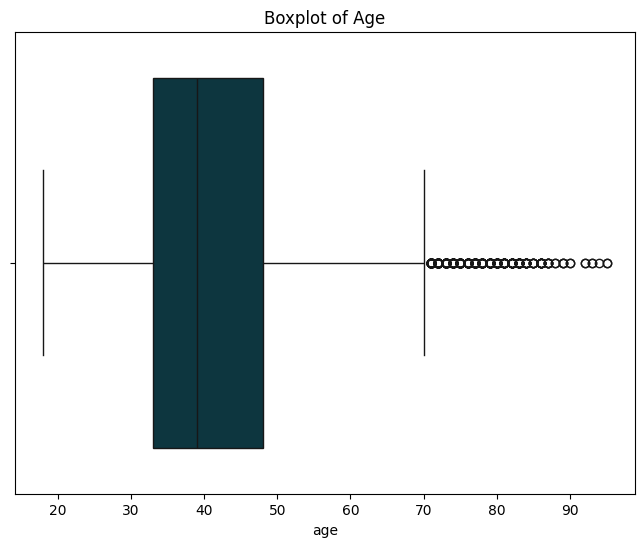

In [64]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank['age'], color="#053B47")  # Use the color you specified for 'age'
plt.title('Boxplot of Age')
plt.show()

In [65]:
age_outliers_Add = outliers_iqr_Bank_Add['age']
print(f"{'age'}: {age_outliers_Add.count()} outliers")
print(f"   - Min: {age_outliers_Add.min()}")
print(f"   - Max: {age_outliers_Add.max()}")
print(f"   - Mean: {age_outliers_Add.mean()}")
print(f"   - Median: {age_outliers_Add.median()}")
print(f"   - Standard Deviation: {age_outliers_Add.std()}")
print(f"   - Q1: {Q1_Bank_Add['age']}")
print(f"   - Q3: {Q3_Bank_Add['age']}")
print(f"   - IQR: {Q3_Bank_Add['age']-Q1_Bank_Add['age']}")

age: 508 outliers
   - Min: 70.0
   - Max: 98.0
   - Mean: 76.91535433070867
   - Median: 76.0
   - Standard Deviation: 5.69185033440196
   - Q1: 32.0
   - Q3: 47.0
   - IQR: 15.0


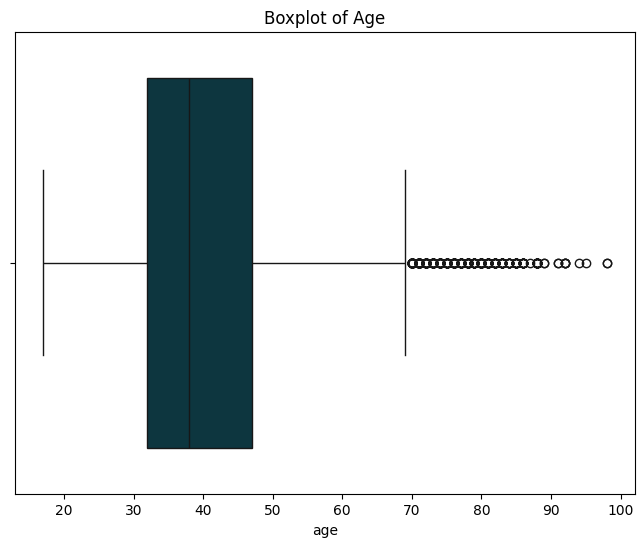

In [66]:
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank_Add['age'], color="#053B47")  # Use the color you specified for 'age'
plt.title('Boxplot of Age')
plt.show()

#### Balance

In [67]:
Balance_outliers = outliers_iqr_Bank['balance']
print(f"{'Balanc'}: {Balance_outliers.count()} outliers")
print(f"   - Min: {Balance_outliers.min()}")
print(f"   - Max: {Balance_outliers.max()}")
print(f"   - Mean: {Balance_outliers.mean()}")
print(f"   - Median: {Balance_outliers.median()}")
print(f"   - Standard Deviation: {Balance_outliers.std()}")
print(f"   - Q1: {Q1_Bank['balance']}")
print(f"   - Q3: {Q3_Bank['balance']}")
print(f"   - IQR: {Q3_Bank['balance']-Q1_Bank['balance']}")

Balanc: 5237 outliers
   - Min: -8019.0
   - Max: 102127.0
   - Mean: 7544.115906053084
   - Median: 5613.0
   - Standard Deviation: 6255.821622915705
   - Q1: 72.0
   - Q3: 1431.0
   - IQR: 1359.0


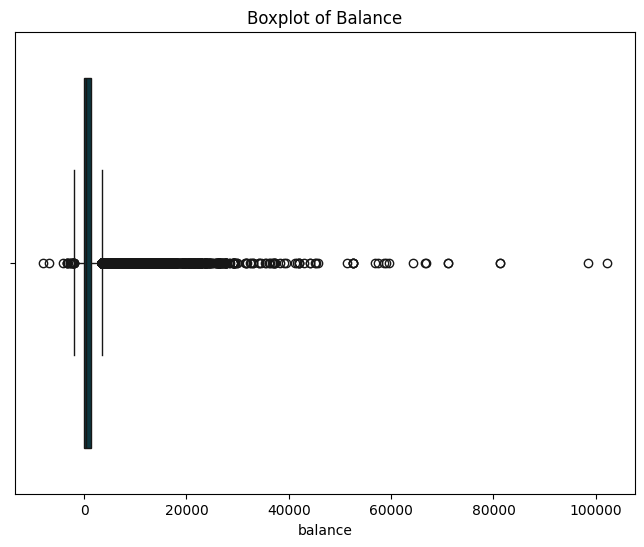

In [68]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank['balance'], color="#053B47")  # Use the color you specified for 'age'
plt.title('Boxplot of Balance')
plt.show()

#### Day

In [69]:
Day_outliers = outliers_iqr_Bank['day']
print(f"{'Day'}: {Day_outliers.count()} outliers")
print(f"   - Min: {Day_outliers.min()}")
print(f"   - Max: {Day_outliers.max()}")
print(f"   - Mean: {Day_outliers.mean()}")
print(f"   - Median: {Day_outliers.median()}")
print(f"   - Standard Deviation: {Day_outliers.std()}")
print(f"   - Q1: {Q1_Bank['day']}")
print(f"   - Q3: {Q3_Bank['day']}")
print(f"   - IQR: {Q3_Bank['day']-Q1_Bank['day']}")

Day: 0 outliers
   - Min: nan
   - Max: nan
   - Mean: nan
   - Median: nan
   - Standard Deviation: nan
   - Q1: 8.0
   - Q3: 21.0
   - IQR: 13.0


c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


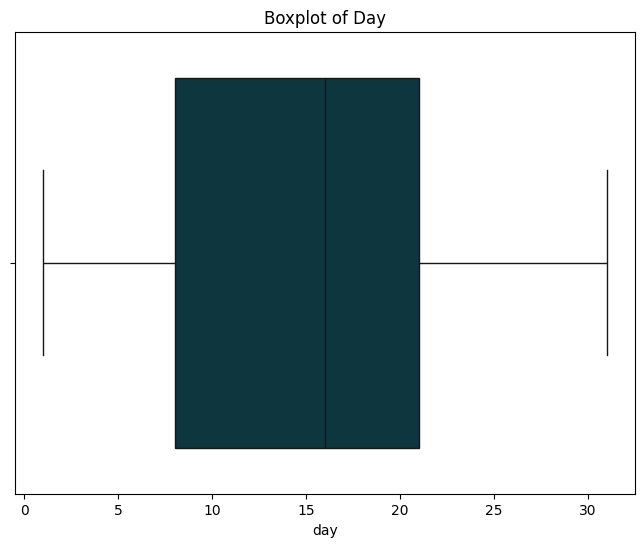

In [70]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank['day'], color="#053B47")  # Use the color you specified for 'age'
plt.title('Boxplot of Day')
plt.show()

#### Duration

In [71]:
Duration_outliers = outliers_iqr_Bank['duration']
print(f"{'Duration'}: {Duration_outliers.count()} outliers")
print(f"   - Min: {Duration_outliers.min()}")
print(f"   - Max: {Duration_outliers.max()}")
print(f"   - Mean: {Duration_outliers.mean()}")
print(f"   - Median: {Duration_outliers.median()}")
print(f"   - Standard Deviation: {Duration_outliers.std()}")
print(f"   - Q1: {Q1_Bank['duration']}")
print(f"   - Q3: {Q3_Bank['duration']}")
print(f"   - IQR: {Q3_Bank['duration']-Q1_Bank['duration']}")

Duration: 3566 outliers
   - Min: 646.0
   - Max: 4918.0
   - Mean: 967.8081884464386
   - Median: 859.0
   - Standard Deviation: 354.909534648286
   - Q1: 103.0
   - Q3: 320.0
   - IQR: 217.0


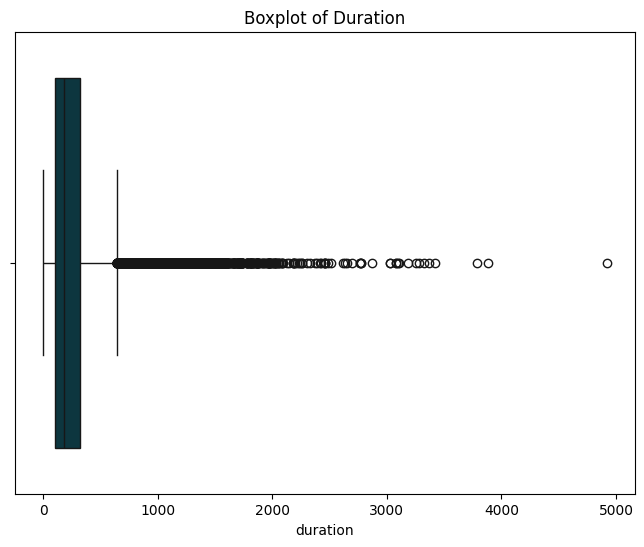

In [72]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank['duration'], color="#053B47")  
plt.title('Boxplot of Duration')
plt.show()

In [73]:
Duration_outliers_Add = outliers_iqr_Bank_Add['duration']
print(f"{'Duration'}: {Duration_outliers_Add.count()} outliers")
print(f"   - Min: {Duration_outliers_Add.min()}")
print(f"   - Max: {Duration_outliers_Add.max()}")
print(f"   - Mean: {Duration_outliers_Add.mean()}")
print(f"   - Median: {Duration_outliers_Add.median()}")
print(f"   - Standard Deviation: {Duration_outliers_Add.std()}")
print(f"   - Q1: {Q1_Bank_Add['duration']}")
print(f"   - Q3: {Q3_Bank_Add['duration']}")
print(f"   - IQR: {Q3_Bank_Add['duration']-Q1_Bank_Add['duration']}")

Duration: 3249 outliers
   - Min: 645.0
   - Max: 4918.0
   - Mean: 967.6922129886119
   - Median: 853.0
   - Standard Deviation: 367.1164859116747
   - Q1: 102.0
   - Q3: 319.0
   - IQR: 217.0


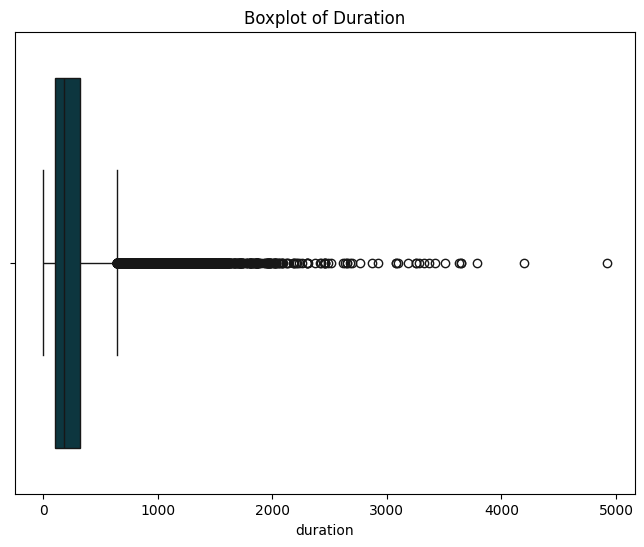

In [74]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank_Add['duration'], color="#053B47")  
plt.title('Boxplot of Duration')
plt.show()

#### Campaign

In [75]:
Campaign_outliers = outliers_iqr_Bank['campaign']
print(f"{'Campaign'}: {Campaign_outliers.count()} outliers")
print(f"   - Min: {Campaign_outliers.min()}")
print(f"   - Max: {Campaign_outliers.max()}")
print(f"   - Mean: {Campaign_outliers.mean()}")
print(f"   - Median: {Campaign_outliers.median()}")
print(f"   - Standard Deviation: {Campaign_outliers.std()}")
print(f"   - Q1: {Q1_Bank['campaign']}")
print(f"   - Q3: {Q3_Bank['campaign']}")
print(f"   - IQR: {Q3_Bank['campaign']-Q1_Bank['campaign']}")

Campaign: 3382 outliers
   - Min: 7.0
   - Max: 63.0
   - Mean: 11.476641040804259
   - Median: 9.0
   - Standard Deviation: 6.0036874856774345
   - Q1: 1.0
   - Q3: 3.0
   - IQR: 2.0


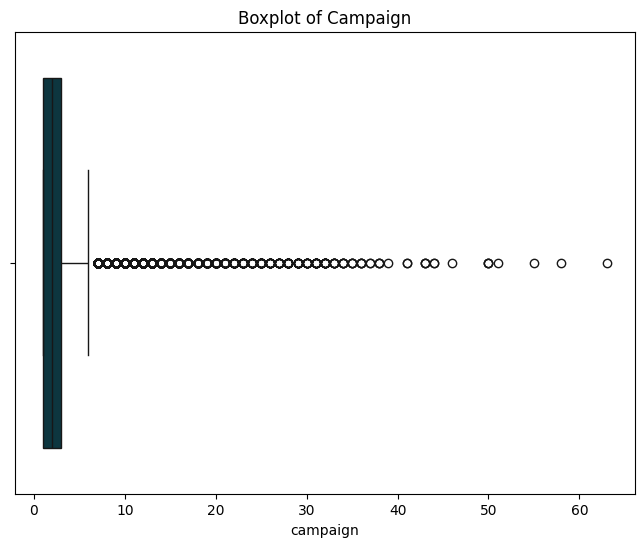

In [76]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank['campaign'], color="#053B47")  
plt.title('Boxplot of Campaign')
plt.show()

In [77]:
Campaign_outliers_Add = outliers_iqr_Bank_Add['campaign']
print(f"{'Campaign'}: {Campaign_outliers_Add.count()} outliers")
print(f"   - Min: {Campaign_outliers_Add.min()}")
print(f"   - Max: {Campaign_outliers_Add.max()}")
print(f"   - Mean: {Campaign_outliers_Add.mean()}")
print(f"   - Median: {Campaign_outliers_Add.median()}")
print(f"   - Standard Deviation: {Campaign_outliers_Add.std()}")
print(f"   - Q1: {Q1_Bank_Add['campaign']}")
print(f"   - Q3: {Q3_Bank_Add['campaign']}")
print(f"   - IQR: {Q3_Bank_Add['campaign']-Q1_Bank_Add['campaign']}")

Campaign: 2641 outliers
   - Min: 7.0
   - Max: 56.0
   - Mean: 10.969329799318439
   - Median: 9.0
   - Standard Deviation: 5.337067196054998
   - Q1: 1.0
   - Q3: 3.0
   - IQR: 2.0


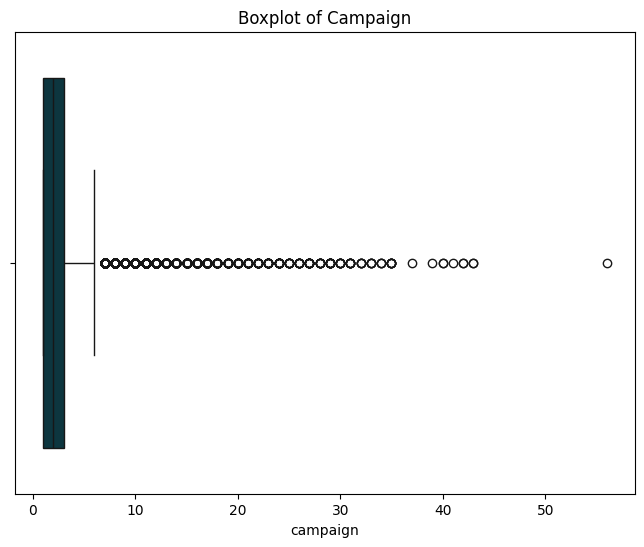

In [78]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank_Add['campaign'], color="#053B47")  
plt.title('Boxplot of Campaign')
plt.show()

#### Pdays

In [79]:
Pdays_outliers = outliers_iqr_Bank['pdays']
print(f"{'Pdays'}: {Pdays_outliers.count()} outliers")
print(f"   - Min: {Pdays_outliers.min()}")
print(f"   - Max: {Pdays_outliers.max()}")
print(f"   - Mean: {Pdays_outliers.mean()}")
print(f"   - Median: {Pdays_outliers.median()}")
print(f"   - Standard Deviation: {Pdays_outliers.std()}")
print(f"   - Q1: {Q1_Bank['pdays']}")
print(f"   - Q3: {Q3_Bank['pdays']}")
print(f"   - IQR: {Q3_Bank['pdays']-Q1_Bank['pdays']}")

Pdays: 9073 outliers
   - Min: 1.0
   - Max: 871.0
   - Mean: 224.6035489915133
   - Median: 194.0
   - Standard Deviation: 115.50570742869188
   - Q1: -1.0
   - Q3: -1.0
   - IQR: 0.0


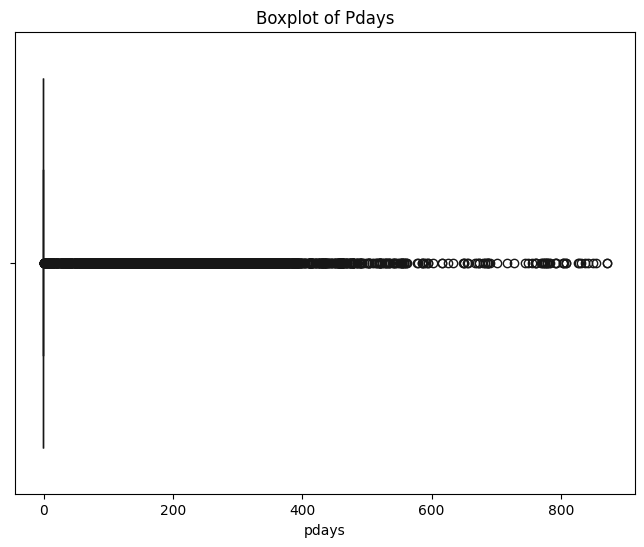

In [80]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank['pdays'], color="#053B47")  
plt.title('Boxplot of Pdays')
plt.show()

In [81]:
Pdays_outliers_Add = outliers_iqr_Bank_Add['pdays']
print(f"{'Pdays'}: {Pdays_outliers_Add.count()} outliers")
print(f"   - Min: {Pdays_outliers_Add.min()}")
print(f"   - Max: {Pdays_outliers_Add.max()}")
print(f"   - Mean: {Pdays_outliers_Add.mean()}")
print(f"   - Median: {Pdays_outliers_Add.median()}")
print(f"   - Standard Deviation: {Pdays_outliers_Add.std()}")
print(f"   - Q1: {Q1_Bank_Add['pdays']}")
print(f"   - Q3: {Q3_Bank_Add['pdays']}")
print(f"   - IQR: {Q3_Bank_Add['pdays']-Q1_Bank_Add['pdays']}")

Pdays: 1675 outliers
   - Min: 0.0
   - Max: 27.0
   - Mean: 6.0
   - Median: 6.0
   - Standard Deviation: 3.832359234189891
   - Q1: 999.0
   - Q3: 999.0
   - IQR: 0.0


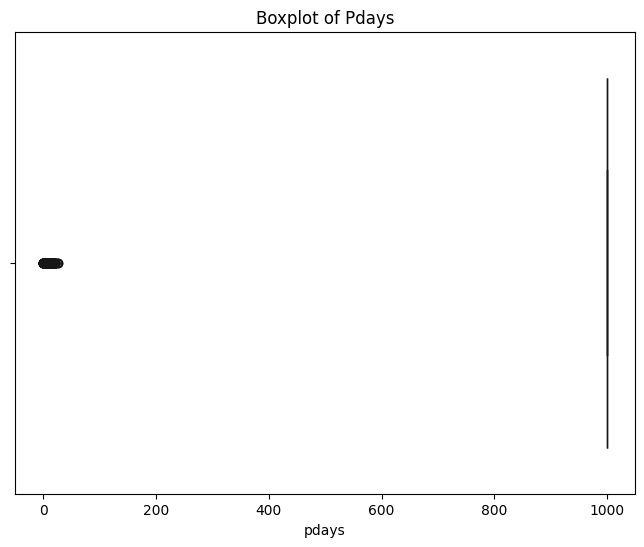

In [82]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank_Add['pdays'], color="#053B47")  
plt.title('Boxplot of Pdays')
plt.show()

#### Previous

In [83]:
Previous_outliers = outliers_iqr_Bank['previous']
print(f"{'Previous'}: {Previous_outliers.count()} outliers")
print(f"   - Min: {Previous_outliers.min()}")
print(f"   - Max: {Previous_outliers.max()}")
print(f"   - Mean: {Previous_outliers.mean()}")
print(f"   - Median: {Previous_outliers.median()}")
print(f"   - Standard Deviation: {Previous_outliers.std()}")
print(f"   - Q1: {Q1_Bank['previous']}")
print(f"   - Q3: {Q3_Bank['previous']}")
print(f"   - IQR: {Q3_Bank['previous']-Q1_Bank['previous']}")

Previous: 9073 outliers
   - Min: 1.0
   - Max: 275.0
   - Mean: 3.1621293949079687
   - Median: 2.0
   - Standard Deviation: 4.437947975997948
   - Q1: 0.0
   - Q3: 0.0
   - IQR: 0.0


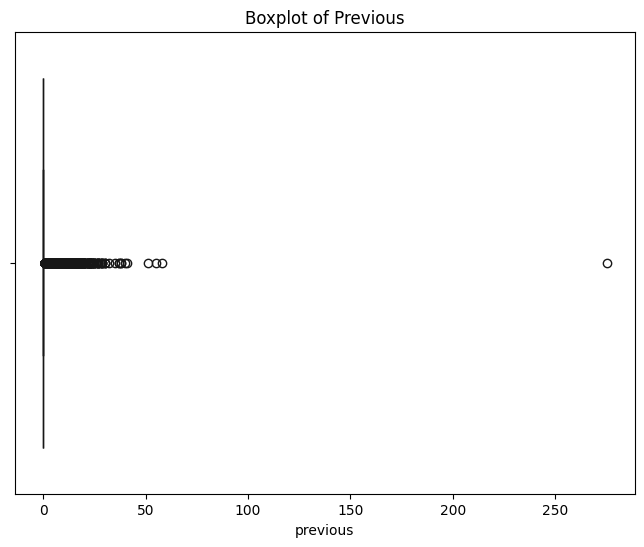

In [84]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank['previous'], color="#053B47")  
plt.title('Boxplot of Previous')
plt.show()

In [85]:
Previous_outliers_Add = outliers_iqr_Bank_Add['previous']
print(f"{'Previous'}: {Previous_outliers_Add.count()} outliers")
print(f"   - Min: {Previous_outliers_Add.min()}")
print(f"   - Max: {Previous_outliers_Add.max()}")
print(f"   - Mean: {Previous_outliers_Add.mean()}")
print(f"   - Median: {Previous_outliers_Add.median()}")
print(f"   - Standard Deviation: {Previous_outliers_Add.std()}")
print(f"   - Q1: {Q1_Bank_Add['previous']}")
print(f"   - Q3: {Q3_Bank_Add['previous']}")
print(f"   - IQR: {Q3_Bank_Add['previous']-Q1_Bank_Add['previous']}")

Previous: 6221 outliers
   - Min: 1.0
   - Max: 7.0
   - Mean: 1.2711782671596206
   - Median: 1.0
   - Standard Deviation: 0.6496996911140693
   - Q1: 0.0
   - Q3: 0.0
   - IQR: 0.0


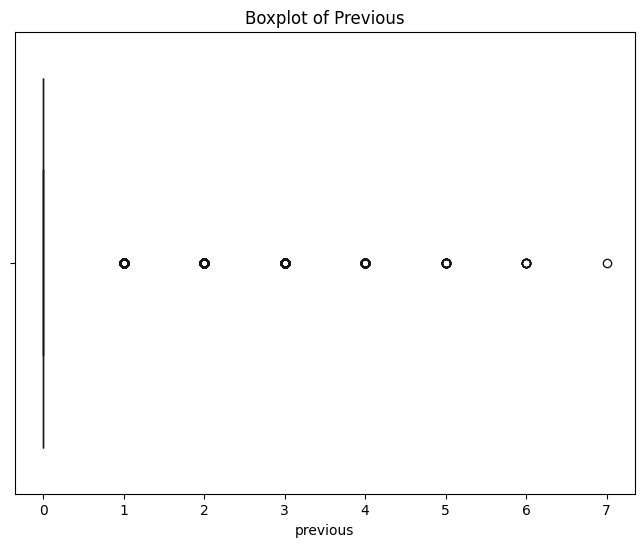

In [86]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank_Add['previous'], color="#053B47")  
plt.title('Boxplot of Previous')
plt.show()

#### Employment Variation Rate

In [87]:
Emp_outliers_Add = outliers_iqr_Bank_Add['emp.var.rate']
print(f"{'Employment Variation Rate'}: {Emp_outliers_Add.count()} outliers")
print(f"   - Min: {Emp_outliers_Add.min()}")
print(f"   - Max: {Emp_outliers_Add.max()}")
print(f"   - Mean: {Emp_outliers_Add.mean()}")
print(f"   - Median: {Emp_outliers_Add.median()}")
print(f"   - Standard Deviation: {Emp_outliers_Add.std()}")
print(f"   - Q1: {Q1_Bank_Add['emp.var.rate']}")
print(f"   - Q3: {Q3_Bank_Add['emp.var.rate']}")
print(f"   - IQR: {Q3_Bank_Add['emp.var.rate']-Q1_Bank_Add['emp.var.rate']}")

Employment Variation Rate: 0 outliers
   - Min: nan
   - Max: nan
   - Mean: nan
   - Median: nan
   - Standard Deviation: nan
   - Q1: -1.8
   - Q3: 1.4
   - IQR: 3.2


c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


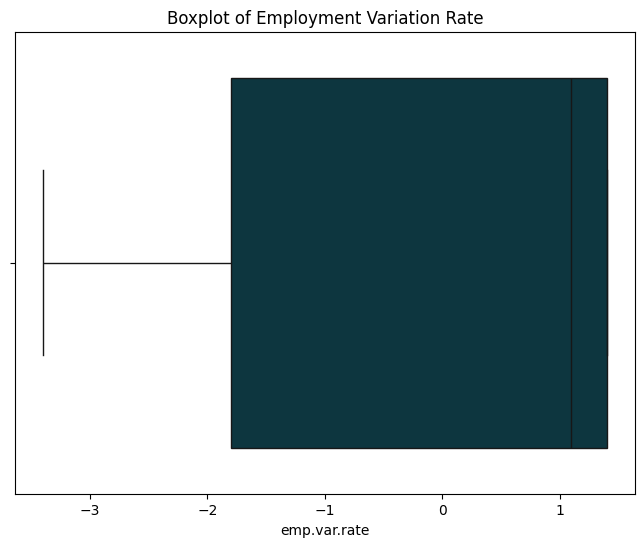

In [88]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank_Add['emp.var.rate'], color="#053B47")  
plt.title('Boxplot of Employment Variation Rate')
plt.show()

#### Consumer Price Index

In [89]:
Price_outliers_Add = outliers_iqr_Bank_Add['cons.price.idx']
print(f"{'Consumer Price Index'}: {Price_outliers_Add.count()} outliers")
print(f"   - Min: {Price_outliers_Add.min()}")
print(f"   - Max: {Price_outliers_Add.max()}")
print(f"   - Mean: {Price_outliers_Add.mean()}")
print(f"   - Median: {Price_outliers_Add.median()}")
print(f"   - Standard Deviation: {Price_outliers_Add.std()}")
print(f"   - Q1: {Q1_Bank_Add['cons.price.idx']}")
print(f"   - Q3: {Q3_Bank_Add['cons.price.idx']}")
print(f"   - IQR: {Q3_Bank_Add['cons.price.idx']-Q1_Bank_Add['cons.price.idx']}")

Consumer Price Index: 0 outliers
   - Min: nan
   - Max: nan
   - Mean: nan
   - Median: nan
   - Standard Deviation: nan
   - Q1: 93.075
   - Q3: 93.994
   - IQR: 0.9189999999999969


c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


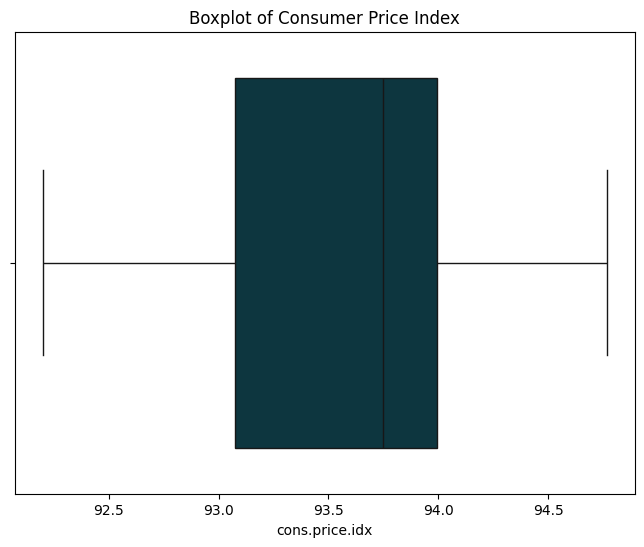

In [90]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank_Add['cons.price.idx'], color="#053B47")  
plt.title('Boxplot of Consumer Price Index')
plt.show()

#### Consumer Confidence Index

In [91]:
Conf_outliers_Add = outliers_iqr_Bank_Add['cons.conf.idx']
print(f"{'Consumer Confidence Index'}: {Conf_outliers_Add.count()} outliers")
print(f"   - Min: {Conf_outliers_Add.min()}")
print(f"   - Max: {Conf_outliers_Add.max()}")
print(f"   - Mean: {Conf_outliers_Add.mean()}")
print(f"   - Median: {Conf_outliers_Add.median()}")
print(f"   - Standard Deviation: {Conf_outliers_Add.std()}")
print(f"   - Q1: {Q1_Bank_Add['cons.conf.idx']}")
print(f"   - Q3: {Q3_Bank_Add['cons.conf.idx']}")
print(f"   - IQR: {Q3_Bank_Add['cons.conf.idx']-Q1_Bank_Add['cons.conf.idx']}")

Consumer Confidence Index: 490 outliers
   - Min: -26.9
   - Max: -26.9
   - Mean: -26.900000000000006
   - Median: -26.9
   - Standard Deviation: 7.112688910193676e-15
   - Q1: -42.7
   - Q3: -36.4
   - IQR: 6.300000000000004


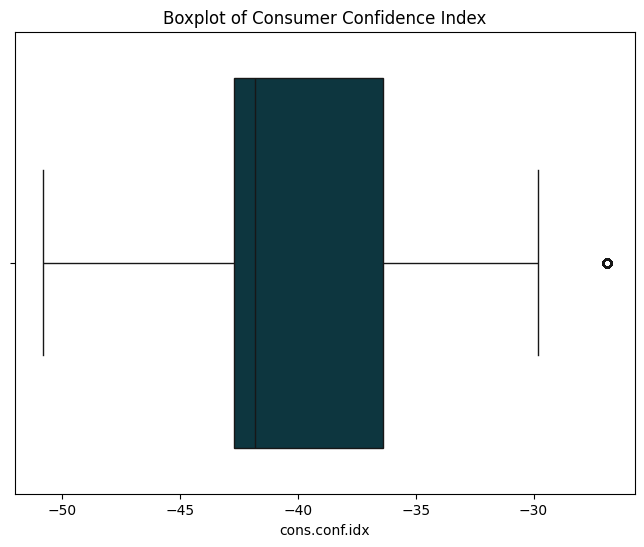

In [92]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank_Add['cons.conf.idx'], color="#053B47")  
plt.title('Boxplot of Consumer Confidence Index')
plt.show()

#### EURIBOR 3-Month Rate

In [93]:
Eur_outliers_Add = outliers_iqr_Bank_Add['euribor3m']
print(f"{'EURIBOR 3-Month Rate'}: {Eur_outliers_Add.count()} outliers")
print(f"   - Min: {Eur_outliers_Add.min()}")
print(f"   - Max: {Eur_outliers_Add.max()}")
print(f"   - Mean: {Eur_outliers_Add.mean()}")
print(f"   - Median: {Eur_outliers_Add.median()}")
print(f"   - Standard Deviation: {Eur_outliers_Add.std()}")
print(f"   - Q1: {Q1_Bank_Add['euribor3m']}")
print(f"   - Q3: {Q3_Bank_Add['euribor3m']}")
print(f"   - IQR: {Q3_Bank_Add['euribor3m']-Q1_Bank_Add['euribor3m']}")

EURIBOR 3-Month Rate: 0 outliers
   - Min: nan
   - Max: nan
   - Mean: nan
   - Median: nan
   - Standard Deviation: nan
   - Q1: 1.344
   - Q3: 4.961
   - IQR: 3.617


c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


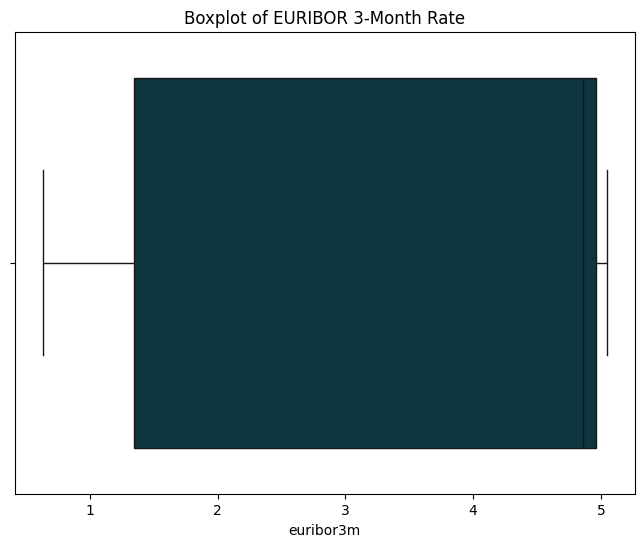

In [94]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank_Add['euribor3m'], color="#053B47")  
plt.title('Boxplot of EURIBOR 3-Month Rate')
plt.show()

#### Number of Employees

In [95]:
Num_outliers_Add = outliers_iqr_Bank_Add['nr.employed']
print(f"{'Number of Employees'}: {Num_outliers_Add.count()} outliers")
print(f"   - Min: {Num_outliers_Add.min()}")
print(f"   - Max: {Num_outliers_Add.max()}")
print(f"   - Mean: {Num_outliers_Add.mean()}")
print(f"   - Median: {Num_outliers_Add.median()}")
print(f"   - Standard Deviation: {Num_outliers_Add.std()}")
print(f"   - Q1: {Q1_Bank_Add['nr.employed']}")
print(f"   - Q3: {Q3_Bank_Add['nr.employed']}")
print(f"   - IQR: {Q3_Bank_Add['nr.employed']-Q1_Bank_Add['nr.employed']}")

Number of Employees: 0 outliers
   - Min: nan
   - Max: nan
   - Mean: nan
   - Median: nan
   - Standard Deviation: nan
   - Q1: 5099.1
   - Q3: 5228.1
   - IQR: 129.0


c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


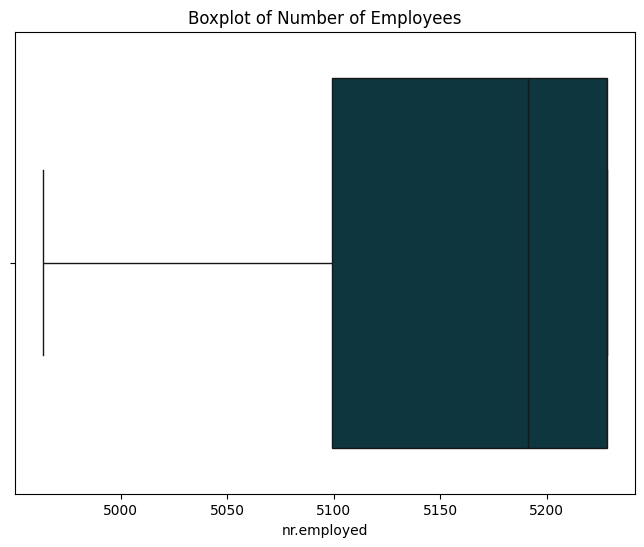

In [96]:
custom_colors = ["#053B47", "#5E9299", "#E8B867", "#FFC1A2", "#FFEAE0", "#FAF3EE"]
sns.set_palette(custom_colors)
plt.figure(figsize=(8, 6))
sns.boxplot(x=Bank_Add['nr.employed'], color="#053B47")  
plt.title('Boxplot of Number of Employees')
plt.show()

### Detecting Missing Values: Ensuring Data Integrity through Header and Content Inspection

<Axes: >

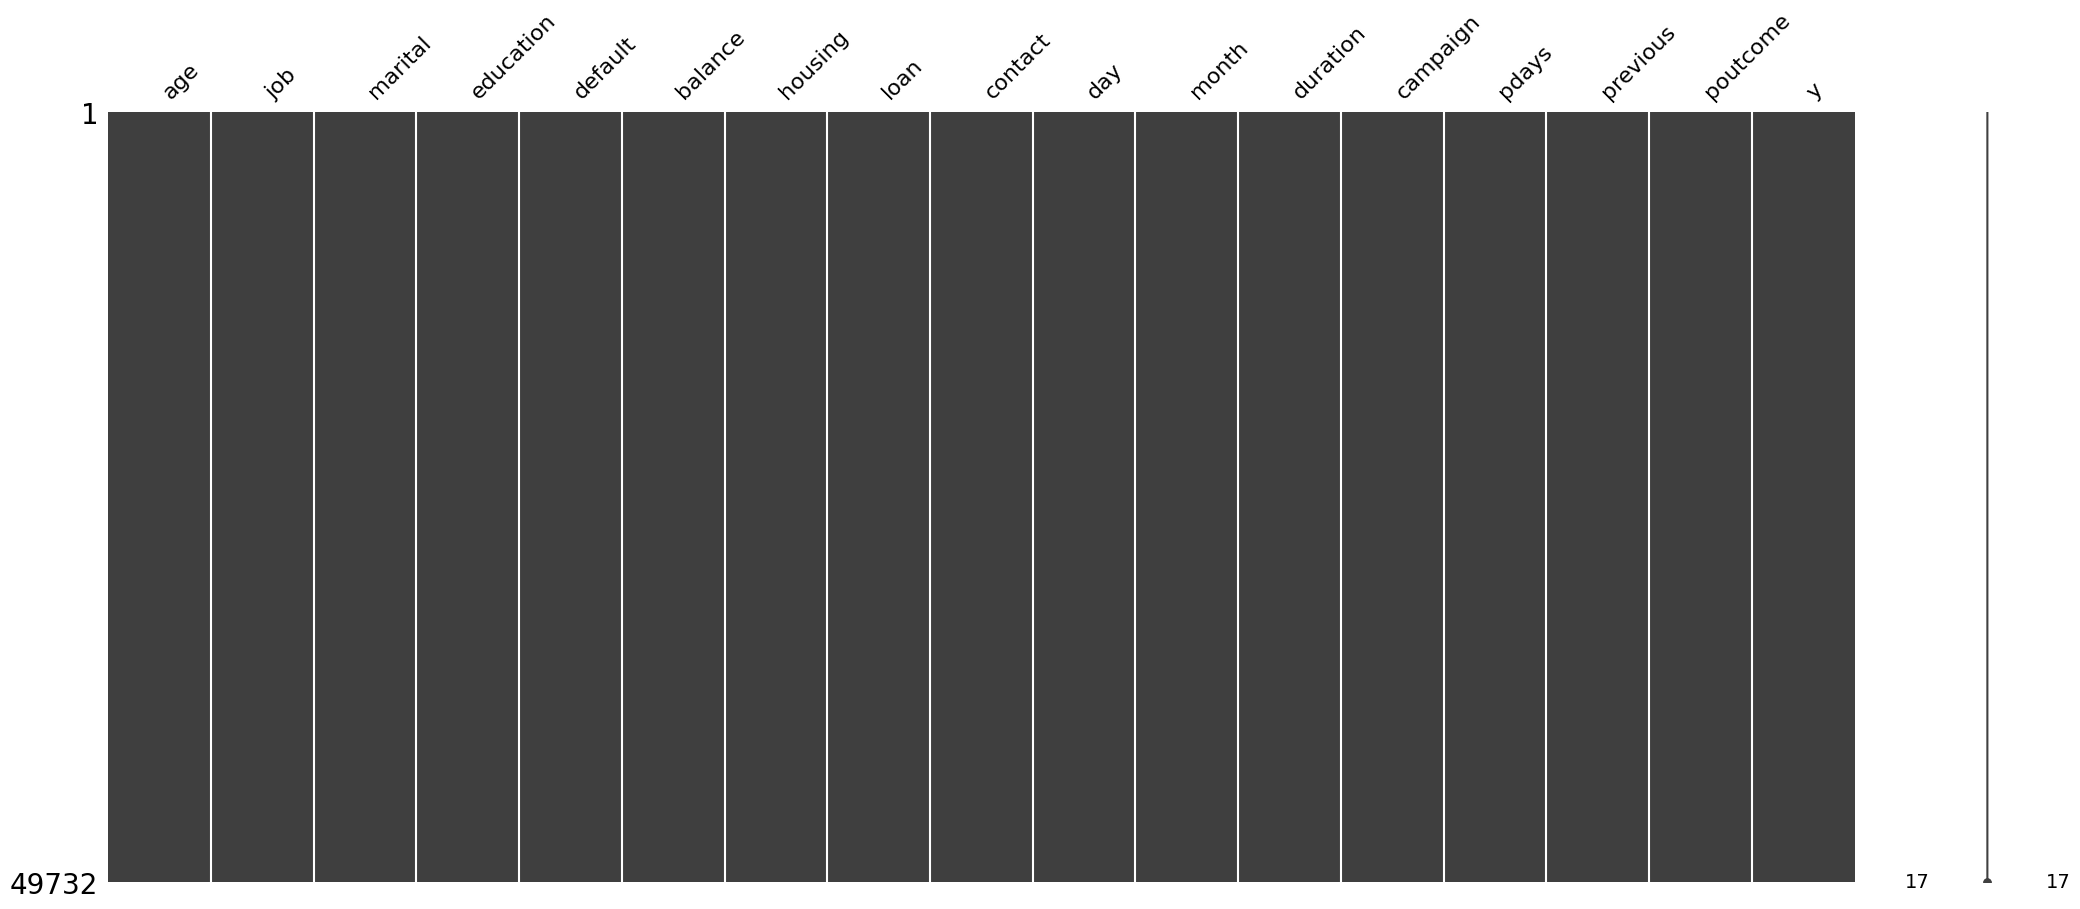

In [97]:
msno.matrix(Bank)

<Axes: >

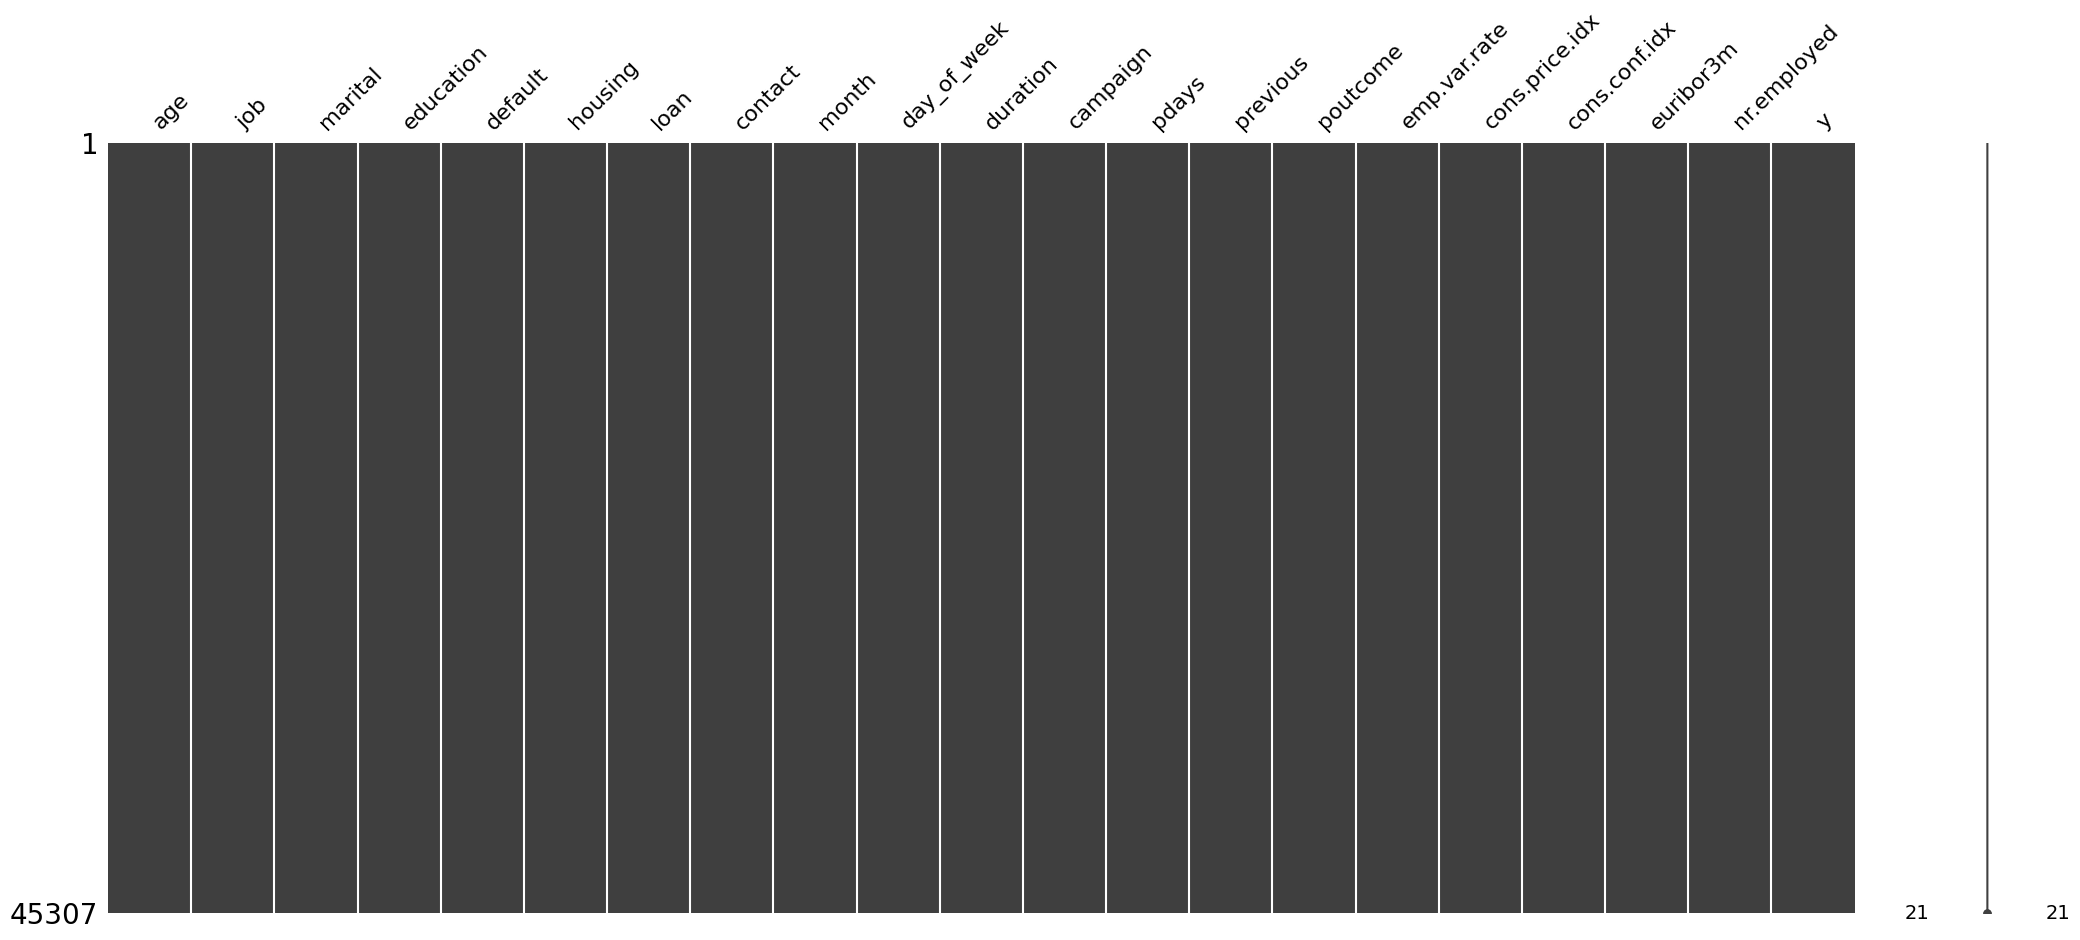

In [98]:
msno.matrix(Bank_Add)